In [1]:
import pandas as pd
import datetime as DT
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as sta

# Importing Excel Files and Joining using OUTER JOIN

In [2]:
set(master['SUB_PRODUCT_CD'])

NameError: name 'master' is not defined

In [3]:
xls = pd.ExcelFile('prod data.xlsx')
df1 = pd.read_excel(xls,'Customer Details')
df2 = pd.read_excel(xls,'Customer Address Details')
df3 = pd.read_excel(xls,'Favourite Products')
df4 = pd.read_excel(xls,'Customer Family Details')
df5 = pd.read_excel(xls,'Case Master')
df6 = pd.read_excel(xls,'Policy Trans Details')
df7 = pd.read_excel(xls,'Case Policy Details')
df8 = pd.read_excel(xls,'Product Details')
df1.rename(columns = {'# CUST_ID' : 'CUST_ID'},inplace = True)
df2.rename(columns = {'# CUST_ADDRESS_ID' : 'CUST_ADDRESS_ID'},inplace = True)
df3.rename(columns = {'# FAV_ID' : 'FAV_ID'},inplace = True)
#df4.rename(columns = {'# CUST_FML_ID' : 'CUST_FML_ID'},inplace = True)
df5.rename(columns = {'# CASE_ID' : 'CASE_ID'},inplace = True)
df6.rename(columns = {'# POL_TRANS_ID' : 'POL_TRANS_ID'},inplace = True)
df7.rename(columns = {'# POLICY_DTLS_ID' : 'POLICY_DTLS_ID'},inplace = True)
df8.rename(columns = {'# ROW_NUM' : 'ROW_NUM'},inplace = True)
df1
df1df2 = pd.merge(df1,df2,on='CUST_ID',how='outer')
df2df3 = pd.merge(df1df2,df3,on = 'CUST_ID',how = 'outer')
#df3df4 = pd.merge(df2df3,df4,on = 'CUST_ID',how = 'outer')
#df4df5 = pd.merge(df3df4,df5,on = 'CUST_ID',how = 'outer')
df5df6 = pd.merge(df2df3,df6,on = 'CUST_ID',how = 'outer')
df6df7 = pd.merge(df5df6,df8,left_on = 'CUST_ID',right_on = 'ROW_NUM',how = 'outer')
master = pd.merge(df6df7,df7,left_on = 'CUST_ID',right_on = 'CASE_ID',how = 'outer')

c = 1

#print(df6df7)
print(master)

      CUST_ID  VGRO_CUST_ID  VGRO_LEAD_ID_x  REFER_CUST_ID  FIRST_NM  LAST_NM  \
0           1           NaN             NaN            NaN       NaN      NaN   
1           2           NaN             NaN            NaN    traXXX      NaN   
2           3           NaN             NaN            NaN      MAAN      NaN   
3           4           NaN             NaN            NaN  vardhini      NaN   
4           5         713.0          1028.0            NaN       NaN      NaN   
...       ...           ...             ...            ...       ...      ...   
28843     NaN           NaN             NaN            NaN       NaN      NaN   
28844     NaN           NaN             NaN            NaN       NaN      NaN   
28845     NaN           NaN             NaN            NaN       NaN      NaN   
28846     NaN           NaN             NaN            NaN       NaN      NaN   
28847     NaN           NaN             NaN            NaN       NaN      NaN   

       MIDDLE_NM  CUSTOMER_

In [4]:
master.shape

(28848, 119)

In [5]:
master.drop(19,axis=0,inplace=True)
print(master.head(20))

   CUST_ID  VGRO_CUST_ID  VGRO_LEAD_ID_x  REFER_CUST_ID         FIRST_NM  \
0        1           NaN             NaN            NaN              NaN   
1        2           NaN             NaN            NaN           traXXX   
2        3           NaN             NaN            NaN             MAAN   
3        4           NaN             NaN            NaN         vardhini   
4        5         713.0          1028.0            NaN              NaN   
5        6         714.0          1001.0            NaN              NaN   
6        7         715.0          1007.0            NaN              NaN   
7        8         716.0          1034.0            NaN              NaN   
8        9           NaN             NaN            NaN           Harsha   
9       10         651.0          1220.0            NaN           Harsha   
10      11           NaN             NaN            NaN  manthena Manora   
11      12         717.0           958.0            NaN              NaN   
12      13  

In [6]:
#master.to_excel('output_28_05.xlsx')

In [7]:
#EDA
datatypes = zip(master.columns.tolist(), list(master.dtypes))
for i in datatypes:
    print(i)


('CUST_ID', dtype('O'))
('VGRO_CUST_ID', dtype('float64'))
('VGRO_LEAD_ID_x', dtype('float64'))
('REFER_CUST_ID', dtype('float64'))
('FIRST_NM', dtype('O'))
('LAST_NM', dtype('float64'))
('MIDDLE_NM', dtype('float64'))
('CUSTOMER_TYP', dtype('float64'))
('TITLE', dtype('float64'))
('DOB', dtype('<M8[ns]'))
('NATIONAL_ID', dtype('O'))
('LOCATION', dtype('float64'))
('GENDER', dtype('O'))
('MARITAL_STATUS', dtype('float64'))
('AADHAR', dtype('float64'))
('PAN', dtype('float64'))
('RESIDENT', dtype('float64'))
('INDUSTRY', dtype('float64'))
('OCCUPATION', dtype('O'))
('EDUCATION', dtype('float64'))
('SPOUSE_NM', dtype('O'))
('DEPENDENTS_NUM', dtype('O'))
('FATHER_NM', dtype('float64'))
('MOTHER_NM', dtype('float64'))
('NATIONALITY', dtype('O'))
('RELIGION', dtype('float64'))
('PH_NUM', dtype('O'))
('BRANCH', dtype('float64'))
('EMAIL', dtype('O'))
('FOLDER_ID', dtype('<M8[ns]'))
('FOLDER_NUM', dtype('O'))
('SOURCE', dtype('O'))
('FCM_TOKEN', dtype('O'))
('NATIONAL_ID_STATUS', dtype('float

# Converting Datatypes

In [8]:
convert = {
    'LAST_NM':str,
    'MIDDLE_NM':str,
    'CUSTOMER_TYP':str,
    'TITLE':str,
    'LOCATION':str,
    'MARITAL_STATUS':str,
    'AADHAR':str
}
master = master.astype(convert)

In [9]:
datatypes = zip(master.columns.tolist(), list(master.dtypes))
for i in datatypes:
    print(i)

('CUST_ID', dtype('O'))
('VGRO_CUST_ID', dtype('float64'))
('VGRO_LEAD_ID_x', dtype('float64'))
('REFER_CUST_ID', dtype('float64'))
('FIRST_NM', dtype('O'))
('LAST_NM', dtype('O'))
('MIDDLE_NM', dtype('O'))
('CUSTOMER_TYP', dtype('O'))
('TITLE', dtype('O'))
('DOB', dtype('<M8[ns]'))
('NATIONAL_ID', dtype('O'))
('LOCATION', dtype('O'))
('GENDER', dtype('O'))
('MARITAL_STATUS', dtype('O'))
('AADHAR', dtype('O'))
('PAN', dtype('float64'))
('RESIDENT', dtype('float64'))
('INDUSTRY', dtype('float64'))
('OCCUPATION', dtype('O'))
('EDUCATION', dtype('float64'))
('SPOUSE_NM', dtype('O'))
('DEPENDENTS_NUM', dtype('O'))
('FATHER_NM', dtype('float64'))
('MOTHER_NM', dtype('float64'))
('NATIONALITY', dtype('O'))
('RELIGION', dtype('float64'))
('PH_NUM', dtype('O'))
('BRANCH', dtype('float64'))
('EMAIL', dtype('O'))
('FOLDER_ID', dtype('<M8[ns]'))
('FOLDER_NUM', dtype('O'))
('SOURCE', dtype('O'))
('FCM_TOKEN', dtype('O'))
('NATIONAL_ID_STATUS', dtype('float64'))
('ADDRESS_STATUS', dtype('O'))
('STA

In [10]:
print(master.shape)

(28847, 119)


In [11]:
#Dropping all rows which has CUST_ID missing
master = master.dropna(subset=['CUST_ID'])

# Deriving AGE Column from DOB field

In [12]:
#Deriving Age Column from DOB
now = pd.Timestamp('now')
master['DOB'] = master['DOB'].where(master['DOB'] < now, master['DOB'] -  np.timedelta64(100, 'Y'))
master['AGE'] = (now - master['DOB']).astype('<m8[Y]')

In [13]:
print(master)

      CUST_ID  VGRO_CUST_ID  VGRO_LEAD_ID_x  REFER_CUST_ID  FIRST_NM LAST_NM  \
0           1           NaN             NaN            NaN       NaN     nan   
1           2           NaN             NaN            NaN    traXXX     nan   
2           3           NaN             NaN            NaN      MAAN     nan   
3           4           NaN             NaN            NaN  vardhini     nan   
4           5         713.0          1028.0            NaN       NaN     nan   
...       ...           ...             ...            ...       ...     ...   
23699     115           NaN             NaN            NaN       NaN     nan   
23700     123           NaN             NaN            NaN       NaN     nan   
23701     123           NaN             NaN            NaN       NaN     nan   
23702     170           NaN             NaN            NaN       NaN     nan   
23703     170           NaN             NaN            NaN       NaN     nan   

      MIDDLE_NM CUSTOMER_TYP TITLE     

# Removing Columns which has more than 95% values missing

In [14]:
missing = master.isna().mean()*100
deleteL = []
c = 0
print("Shape before removing Columns",master.shape)
for i in missing:
    if(i >= 95):
        deleteL.append(master.columns[c])
    c += 1
#print(deleteL)
master.drop(labels = deleteL,axis = 1,inplace = True)
print("Shape after removing Columns",master.shape)

Shape before removing Columns (23703, 120)
Shape after removing Columns (23703, 59)


# Removing Unnecessary Columns

In [15]:
print(master.columns.tolist())
print("Shape before removing Columns",master.shape)
unnecessary_Columns = ['VGRO_CUST_ID','VGRO_LEAD_ID_x','REFER_CUST_ID','FIRST_NM', 'LAST_NM', 'MIDDLE_NM', 'CUSTOMER_TYP', 'TITLE','DOB','LOCATION','MARITAL_STATUS','AADHAR',
                      'FOLDER_NUM','FCM_TOKEN', 'CREATED_BY_x', 'UPDATED_BY_x', 'CUST_ADDRESS_ID', 'ADDRESS_TYPE_ID','CREATED_BY_y', 'CREATE_TS_y','UPDATED_BY_y', 'UPDATE_TS_y',
                      'IS_ACTIVE_y', 'IS_ACTIVE_x', 'POL_TRANS_ID','CASE_ID_x','SUBMITTED_BY','SUBMITTED_TS', 'UPDATE_BY_x', 'UPDATE_TS_y', 'POLICY_DTLS_ID', 'CASE_ID_y',
                      'PLCY_HOLDER','PLCY_NUM', 'PLCY_URL', 'IS_ACTIVE_y', 'UPDATE_BY_y', 'UPDATE_TS', 'CREATE_BY', 'CREATE_TS_y']
master.drop(labels = unnecessary_Columns,axis = 1,inplace = True)
print("Shape after removing Columns",master.shape)

['CUST_ID', 'VGRO_CUST_ID', 'VGRO_LEAD_ID_x', 'REFER_CUST_ID', 'FIRST_NM', 'LAST_NM', 'MIDDLE_NM', 'CUSTOMER_TYP', 'TITLE', 'DOB', 'NATIONAL_ID', 'LOCATION', 'GENDER', 'MARITAL_STATUS', 'AADHAR', 'PH_NUM', 'EMAIL', 'FOLDER_NUM', 'SOURCE', 'FCM_TOKEN', 'ADDRESS_STATUS', 'LOCALE_VAL', 'IS_ACTIVE_x', 'CREATED_BY_x', 'UPDATED_BY_x', 'CUST_ADDRESS_ID', 'ADDRESS_TYPE_ID', 'COUNTRY', 'STATE_VAL', 'CREATED_BY_y', 'CREATE_TS_y', 'UPDATED_BY_y', 'UPDATE_TS_y', 'IS_ACTIVE_y', 'FAV_ID', 'VGRO_LEAD_ID_y', 'CLIENT_CD_x', 'SUB_PRODUCT_CD', 'IS_ACTIVE_x', 'POL_TRANS_ID', 'CASE_ID_x', 'TRANS_METHOD', 'PMNT_TRNS_STATUS', 'AMOUNT', 'SUBMITTED_BY', 'SUBMITTED_TS', 'UPDATE_BY_x', 'UPDATE_TS_y', 'POLICY_DTLS_ID', 'CASE_ID_y', 'PLCY_HOLDER', 'PLCY_NUM', 'PLCY_URL', 'IS_ACTIVE_y', 'UPDATE_BY_y', 'UPDATE_TS', 'CREATE_BY', 'CREATE_TS_y', 'AGE']
Shape before removing Columns (23703, 59)
Shape after removing Columns (23703, 18)


In [16]:
print(master)
master.describe(include = 'all')

      CUST_ID  NATIONAL_ID        GENDER       PH_NUM  \
0           1          NaN           NaN    656565656   
1           2         1234  PA_LV_GEN_FM  093529XXX9M   
2           3    123456789   PA_LV_GEN_M    770246878   
3           4  destabilize   PA_LV_GEN_M    657464565   
4           5          NaN           NaN    876544567   
...       ...          ...           ...          ...   
23699     115          NaN           NaN          NaN   
23700     123          NaN           NaN          NaN   
23701     123          NaN           NaN          NaN   
23702     170          NaN           NaN          NaN   
23703     170          NaN           NaN          NaN   

                          EMAIL  SOURCE ADDRESS_STATUS LOCALE_VAL   COUNTRY  \
0                           NaN  source            NaN      en_US  CNT_VIET   
1       ttxuandao9XXX@gmail.com     WEB              Y      en_US  CNT_VIET   
2      sattosinha2002@gmail.com     WEB              Y      en_US  CNT_VIET   

,CUST_ID,NATIONAL_ID,GENDER,PH_NUM,EMAIL,SOURCE,ADDRESS_STATUS,LOCALE_VAL,COUNTRY,STATE_VAL,FAV_ID,VGRO_LEAD_ID_y,CLIENT_CD_x,SUB_PRODUCT_CD,TRANS_METHOD,PMNT_TRNS_STATUS,AMOUNT,AGE
count,23703.0,21163.0,21725,23081.0,22066,23080,19478,21764,22873,22588,2260.000000,2260.000000,1816,2260,22743,22743,9448.000000,22060.000000
unique,8436.0,6928.0,2,8220.0,7218,3,1,2,1,82,NaN,NaN,4,37,6,5,NaN,NaN
top,303.0,2121.0,PA_LV_GEN_M,935294419.0,ttxuanl@gmail.com,WEB,Y,vi_VN,CNT_VIET,ST_VIET_50,NaN,NaN,PA_CLNT_PVI,PAIN_NLIFE_IDTHFT_IDTHFT,PA_TRANS_BANK,PA_TRANS_STATUS_CP,NaN,NaN
freq,1080.0,1110.0,14360,1104.0,1093,22553,19478,17556,22873,3220,NaN,NaN,1215,298,11160,9444,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,283.998230,6914.197788,NaN,NaN,NaN,NaN,4502.434378,36.028740
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.252335,6360.056255,NaN,NaN,NaN,NaN,56473.983687,11.260801
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,7.000000,NaN,NaN,NaN,NaN,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.250000,813.000000,NaN,NaN,NaN,NaN,0.000000,28.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,306.000000,1569.000000,NaN,NaN,NaN,NaN,0.000000,35.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,348.000000,13543.000000,NaN,NaN,NaN,NaN,0.000000,42.000000


In [17]:
master.head(100)

,CUST_ID,NATIONAL_ID,GENDER,PH_NUM,EMAIL,SOURCE,ADDRESS_STATUS,LOCALE_VAL,COUNTRY,STATE_VAL,FAV_ID,VGRO_LEAD_ID_y,CLIENT_CD_x,SUB_PRODUCT_CD,TRANS_METHOD,PMNT_TRNS_STATUS,AMOUNT,AGE
0,1,NaN,NaN,656565656,NaN,source,NaN,en_US,CNT_VIET,Tỉnh Sơn La,1.0,907.0,NaN,PAIN_NLIFE_TWOWHL_PAK_C,NaN,NaN,NaN,NaN
1,2,1234,PA_LV_GEN_FM,093529XXX9M,ttxuandao9XXX@gmail.com,WEB,Y,en_US,CNT_VIET,Thành phố Hồ Chí Minh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0
2,3,123456789,PA_LV_GEN_M,770246878,sattosinha2002@gmail.com,WEB,Y,en_US,CNT_VIET,Tỉnh Lào Cai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
3,4,destabilize,PA_LV_GEN_M,657464565,h@gmail.com,WEB,Y,en_US,CNT_VIET,Tỉnh Sơn La,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,5,NaN,NaN,876544567,NaN,WEB,NaN,en_US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,258,22222333,PA_LV_GEN_M,909656306,anh@gmail.com,VGRO,Y,vi_VN,CNT_VIET,ST_VIET_57,NaN,NaN,NaN,NaN,PA_TRANS_ONLINE,PA_TRANS_STATUS_FAIL,NaN,25.0
97,258,22222333,PA_LV_GEN_M,909656306,anh@gmail.com,VGRO,Y,vi_VN,CNT_VIET,ST_VIET_57,NaN,NaN,NaN,NaN,PA_TRANS_ONLINE,PA_TRANS_STATUS_CP,66000.0,25.0
98,258,22222333,PA_LV_GEN_M,909656306,anh@gmail.com,VGRO,Y,vi_VN,CNT_VIET,ST_VIET_57,NaN,NaN,NaN,NaN,PA_TRANS_ONLINE,PA_TRANS_STATUS_FAIL,NaN,25.0
99,258,22222333,PA_LV_GEN_M,909656306,anh@gmail.com,VGRO,Y,vi_VN,CNT_VIET,ST_VIET_57,NaN,NaN,NaN,NaN,PA_TRANS_ONLINE,PA_TRANS_STATUS_FAIL,NaN,25.0


# Replacing NaN values in AGE by its MEAN

In [18]:
meanAge = round(master['AGE'].mean())

master['AGE'] = master['AGE'].fillna(meanAge)
master

,CUST_ID,NATIONAL_ID,GENDER,PH_NUM,EMAIL,SOURCE,ADDRESS_STATUS,LOCALE_VAL,COUNTRY,STATE_VAL,FAV_ID,VGRO_LEAD_ID_y,CLIENT_CD_x,SUB_PRODUCT_CD,TRANS_METHOD,PMNT_TRNS_STATUS,AMOUNT,AGE
0,1,NaN,NaN,656565656,NaN,source,NaN,en_US,CNT_VIET,Tỉnh Sơn La,1.0,907.0,NaN,PAIN_NLIFE_TWOWHL_PAK_C,NaN,NaN,NaN,36.0
1,2,1234,PA_LV_GEN_FM,093529XXX9M,ttxuandao9XXX@gmail.com,WEB,Y,en_US,CNT_VIET,Thành phố Hồ Chí Minh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0
2,3,123456789,PA_LV_GEN_M,770246878,sattosinha2002@gmail.com,WEB,Y,en_US,CNT_VIET,Tỉnh Lào Cai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
3,4,destabilize,PA_LV_GEN_M,657464565,h@gmail.com,WEB,Y,en_US,CNT_VIET,Tỉnh Sơn La,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,5,NaN,NaN,876544567,NaN,WEB,NaN,en_US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23699,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,88.0,NaN,PAIN_NLIFE_TWOWHL_PAK_C,NaN,NaN,NaN,36.0
23700,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,93.0,NaN,PAIN_LIFE_LIFEINV_DAICHI,NaN,NaN,NaN,36.0
23701,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,93.0,NaN,PAIN_LIFE_EDMNT_DAICHI,NaN,NaN,NaN,36.0
23702,170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,213.0,NaN,PAIN_LIFE_EDMNT_DAICHI,NaN,NaN,NaN,36.0


# The final Dataframe Description

In [19]:
master.describe(include = 'all')

,CUST_ID,NATIONAL_ID,GENDER,PH_NUM,EMAIL,SOURCE,ADDRESS_STATUS,LOCALE_VAL,COUNTRY,STATE_VAL,FAV_ID,VGRO_LEAD_ID_y,CLIENT_CD_x,SUB_PRODUCT_CD,TRANS_METHOD,PMNT_TRNS_STATUS,AMOUNT,AGE
count,23703.0,21163.0,21725,23081.0,22066,23080,19478,21764,22873,22588,2260.000000,2260.000000,1816,2260,22743,22743,9448.000000,23703.000000
unique,8436.0,6928.0,2,8220.0,7218,3,1,2,1,82,NaN,NaN,4,37,6,5,NaN,NaN
top,303.0,2121.0,PA_LV_GEN_M,935294419.0,ttxuanl@gmail.com,WEB,Y,vi_VN,CNT_VIET,ST_VIET_50,NaN,NaN,PA_CLNT_PVI,PAIN_NLIFE_IDTHFT_IDTHFT,PA_TRANS_BANK,PA_TRANS_STATUS_CP,NaN,NaN
freq,1080.0,1110.0,14360,1104.0,1093,22553,19478,17556,22873,3220,NaN,NaN,1215,298,11160,9444,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,283.998230,6914.197788,NaN,NaN,NaN,NaN,4502.434378,36.026748
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.252335,6360.056255,NaN,NaN,NaN,NaN,56473.983687,10.863501
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,7.000000,NaN,NaN,NaN,NaN,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.250000,813.000000,NaN,NaN,NaN,NaN,0.000000,29.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,306.000000,1569.000000,NaN,NaN,NaN,NaN,0.000000,36.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,348.000000,13543.000000,NaN,NaN,NaN,NaN,0.000000,41.000000


In [20]:
#master.info()

## Printing null values count and  Unique values 

In [21]:
for col in master:
    print(col)
    print(sum(master[col].isna()))
    print(master[col].unique())

CUST_ID
0
[1 2 3 ... 115 123 170]
NATIONAL_ID
2540
[nan 1234 123456789 ... 331417325 135259175 33165001906]
GENDER
1978
[nan 'PA_LV_GEN_FM' 'PA_LV_GEN_M']
PH_NUM
622
[656565656 '093529XXX9M' 770246878 ... 982186861 918429008 nan]
EMAIL
1637
[nan 'ttxuandao9XXX@gmail.com' 'sattosinha2002@gmail.com' ...
 'nguyenhailongtb2020@gmail.com' 'vanconghau1@gmail.com'
 'hoa.catlinh@gmail.com']
SOURCE
623
['source' 'WEB' nan 'VGRO']
ADDRESS_STATUS
4225
[nan 'Y']
LOCALE_VAL
1939
['en_US' nan 'vi_VN']
COUNTRY
830
['CNT_VIET' nan]
STATE_VAL
1115
['Tỉnh Sơn La' 'Thành phố Hồ Chí Minh' 'Tỉnh Lào Cai' nan 'Tỉnh Lai Châu'
 'Tỉnh Bạc Liêu' 'ST_VIET_50' 'ST_VIET_32' 'ST_VIET_57' 'ST_VIET_1'
 'ST_VIET_59' 'ST_VIET_20' 'ST_VIET_54' 'ST_VIET_53' 'ST_VIET_56'
 'ST_VIET_60' 'Tỉnh Sóc Trăng' 'ST_VIET_58' 'ST_VIET_55' 'ST_VIET_40'
 'ST_VIET_51' 'ST_VIET_8' 'ST_VIET_62' 'Ho Chi Minh' 'ST_VIET_9'
 'ST_VIET_49' 'ST_VIET_52' 'ST_VIET_7' 'ST_VIET_35' 'ST_VIET_47'
 'ST_VIET_48' 'ST_VIET_6' 'ST_VIET_33' 'ST_VIET_36' 'Vi

# Removing Unnecessary Columns

In [22]:
unn = ['NATIONAL_ID','PH_NUM','EMAIL','ADDRESS_STATUS','COUNTRY','FAV_ID','VGRO_LEAD_ID_y']
master.drop(columns = unn,axis = 1,inplace = True)

# Replacing missing values in GENDER Column

In [23]:
master.columns
master['GENDER'].replace({'PA_LV_GEN_FM':'F','PA_LV_GEN_M':'M'},inplace = True)
master['GENDER'].fillna('M',inplace = True)
master.head(50)

,CUST_ID,GENDER,SOURCE,LOCALE_VAL,STATE_VAL,CLIENT_CD_x,SUB_PRODUCT_CD,TRANS_METHOD,PMNT_TRNS_STATUS,AMOUNT,AGE
0,1,M,source,en_US,Tỉnh Sơn La,NaN,PAIN_NLIFE_TWOWHL_PAK_C,NaN,NaN,NaN,36.0
1,2,F,WEB,en_US,Thành phố Hồ Chí Minh,NaN,NaN,NaN,NaN,NaN,33.0
2,3,M,WEB,en_US,Tỉnh Lào Cai,NaN,NaN,NaN,NaN,NaN,34.0
3,4,M,WEB,en_US,Tỉnh Sơn La,NaN,NaN,NaN,NaN,NaN,1.0
4,5,M,WEB,en_US,NaN,NaN,NaN,NaN,NaN,NaN,36.0
5,6,M,WEB,en_US,NaN,NaN,NaN,NaN,NaN,NaN,36.0
6,7,M,WEB,en_US,NaN,NaN,NaN,NaN,NaN,NaN,36.0
7,8,M,WEB,en_US,NaN,NaN,NaN,NaN,NaN,NaN,36.0
8,9,M,WEB,en_US,Tỉnh Sơn La,NaN,NaN,NaN,NaN,NaN,20.0
9,10,M,WEB,en_US,Tỉnh Lai Châu,NaN,PAIN_NLIFE_TWOWHL_PAK_C,NaN,NaN,NaN,21.0


# Replacing missing values in all the columns by it respective mode

In [24]:
replace = ['SOURCE','LOCALE_VAL','STATE_VAL','CLIENT_CD_x','SUB_PRODUCT_CD','TRANS_METHOD','PMNT_TRNS_STATUS']
for i in replace:
    k = master[i].mode()
    print(k)
    #master[i].fillna(str(k),inplace = True)
master['SOURCE'].fillna('WEB',inplace = True)
master['LOCALE_VAL'].fillna('vi_VN',inplace = True)
master['STATE_VAL'].fillna('ST_VIET_50',inplace = True)
master['CLIENT_CD_x'].fillna('PA_CLNT_PVI',inplace = True)
master['SUB_PRODUCT_CD'].fillna('PAIN_NLIFE_IDTHFT_IDTHFT',inplace = True)
master['TRANS_METHOD'].fillna('PA_TRANS_BANK',inplace = True)
master['PMNT_TRNS_STATUS'].fillna('PA_TRANS_STATUS_CP',inplace = True)
master['AMOUNT'].fillna(round(master['AMOUNT'].mean()),inplace = True)

0    WEB
dtype: object
0    vi_VN
dtype: object
0    ST_VIET_50
dtype: object
0    PA_CLNT_PVI
dtype: object
0    PAIN_NLIFE_IDTHFT_IDTHFT
dtype: object
0    PA_TRANS_BANK
dtype: object
0    PA_TRANS_STATUS_CP
dtype: object


In [25]:
li = set()
for i in master['STATE_VAL']:
    if(str(i)[0] in ['H','T','V']):
        master['STATE_VAL'].replace(i,'Other',inplace = True)


master['PMNT_TRNS_STATUS'].replace({1:'PA_TRANS_STATUS_CP',0:'PA_TRANS_STATUS_FAIL'},inplace = True)
master.head(50)

,CUST_ID,GENDER,SOURCE,LOCALE_VAL,STATE_VAL,CLIENT_CD_x,SUB_PRODUCT_CD,TRANS_METHOD,PMNT_TRNS_STATUS,AMOUNT,AGE
0,1,M,source,en_US,Other,PA_CLNT_PVI,PAIN_NLIFE_TWOWHL_PAK_C,PA_TRANS_BANK,PA_TRANS_STATUS_CP,4502.0,36.0
1,2,F,WEB,en_US,Other,PA_CLNT_PVI,PAIN_NLIFE_IDTHFT_IDTHFT,PA_TRANS_BANK,PA_TRANS_STATUS_CP,4502.0,33.0
2,3,M,WEB,en_US,Other,PA_CLNT_PVI,PAIN_NLIFE_IDTHFT_IDTHFT,PA_TRANS_BANK,PA_TRANS_STATUS_CP,4502.0,34.0
3,4,M,WEB,en_US,Other,PA_CLNT_PVI,PAIN_NLIFE_IDTHFT_IDTHFT,PA_TRANS_BANK,PA_TRANS_STATUS_CP,4502.0,1.0
4,5,M,WEB,en_US,ST_VIET_50,PA_CLNT_PVI,PAIN_NLIFE_IDTHFT_IDTHFT,PA_TRANS_BANK,PA_TRANS_STATUS_CP,4502.0,36.0
5,6,M,WEB,en_US,ST_VIET_50,PA_CLNT_PVI,PAIN_NLIFE_IDTHFT_IDTHFT,PA_TRANS_BANK,PA_TRANS_STATUS_CP,4502.0,36.0
6,7,M,WEB,en_US,ST_VIET_50,PA_CLNT_PVI,PAIN_NLIFE_IDTHFT_IDTHFT,PA_TRANS_BANK,PA_TRANS_STATUS_CP,4502.0,36.0
7,8,M,WEB,en_US,ST_VIET_50,PA_CLNT_PVI,PAIN_NLIFE_IDTHFT_IDTHFT,PA_TRANS_BANK,PA_TRANS_STATUS_CP,4502.0,36.0
8,9,M,WEB,en_US,Other,PA_CLNT_PVI,PAIN_NLIFE_IDTHFT_IDTHFT,PA_TRANS_BANK,PA_TRANS_STATUS_CP,4502.0,20.0
9,10,M,WEB,en_US,Other,PA_CLNT_PVI,PAIN_NLIFE_TWOWHL_PAK_C,PA_TRANS_BANK,PA_TRANS_STATUS_CP,4502.0,21.0


In [26]:
master.describe(include = 'all')

,CUST_ID,GENDER,SOURCE,LOCALE_VAL,STATE_VAL,CLIENT_CD_x,SUB_PRODUCT_CD,TRANS_METHOD,PMNT_TRNS_STATUS,AMOUNT,AGE
count,23703.0,23703,23703,23703,23703,23703,23703,23703,23703,23703.000000,23703.000000
unique,8436.0,2,3,2,64,4,37,6,3,NaN,NaN
top,303.0,M,WEB,vi_VN,ST_VIET_50,PA_CLNT_PVI,PAIN_NLIFE_IDTHFT_IDTHFT,PA_TRANS_BANK,PA_TRANS_STATUS_CP,NaN,NaN
freq,1080.0,16338,23176,19495,4335,23102,21741,12120,10557,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4502.173143,36.026748
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35653.558709,10.863501
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,29.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4502.000000,36.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4502.000000,41.000000


# Dividing the Categorical Values and numerical values

In [27]:
df_N = pd.DataFrame()
df_c = pd.DataFrame()
df_N = master[['AMOUNT','AGE']]
catL = []
for i in list(master.columns):
    if(i not in ['AMOUNT','AGE','CUST_ID']):
        catL.append(i)
df_c = master[catL]

In [28]:

print(df_N.dtypes)

AMOUNT    float64
AGE       float64
dtype: object


#  OUTLIER Detection Using BOX PLOT And Scatter Plot

Box plot forAMOUNT
Box plot forAGE


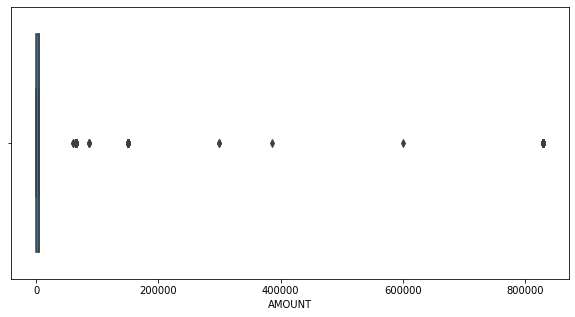

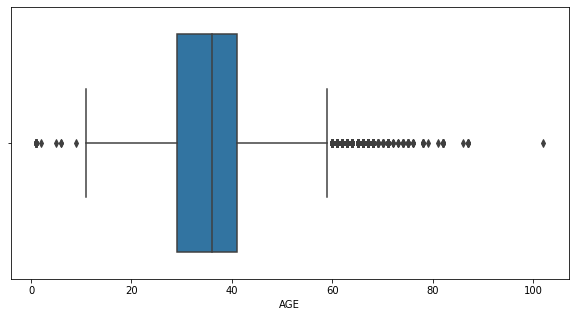

In [29]:
import seaborn as sns
for col in df_N:
    print("Box plot for"+col)
    plt.figure(figsize=(10,5))
    sns.boxplot(df_N[col])

# Finding Skewness of Each Numerical Columns

In [30]:
from scipy.stats import skew 
for col in df_N:
    print(col)
    print ("right-skewenes = {0}".format(df_N[col].skew()))

AMOUNT
right-skewenes = 22.366800472586007
AGE
right-skewenes = 0.6917080833603059


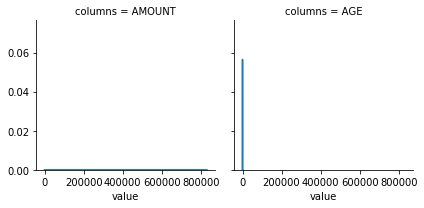

In [31]:
dfm = df_N.melt(var_name='columns')
g = sns.FacetGrid(dfm, col='columns')
g = (g.map(sns.distplot, 'value'))

# Pairplot

In [35]:
#sns.pairplot(df_N)

# Heatmap of Correlation for Numeric Data

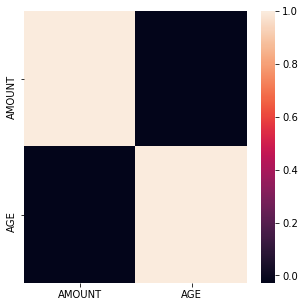

In [36]:
corr = df_N.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr)

# Scater Plots to Find Outliers 

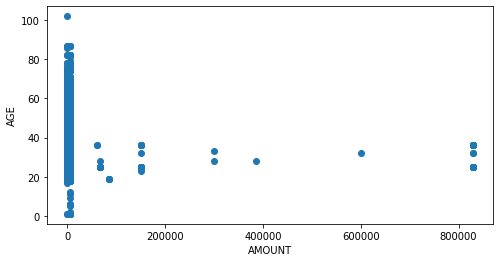

In [37]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(df_N['AMOUNT'], df_N['AGE'])
ax.set_xlabel('AMOUNT')
ax.set_ylabel('AGE')
plt.show()

# Detecting Outliers Using Standard Deviation Method and imputing Outliers with mean and median

*************************Mean Imputation****************
*************************Median Imputation****************
*************************Mean Imputation****************
*************************Median Imputation****************


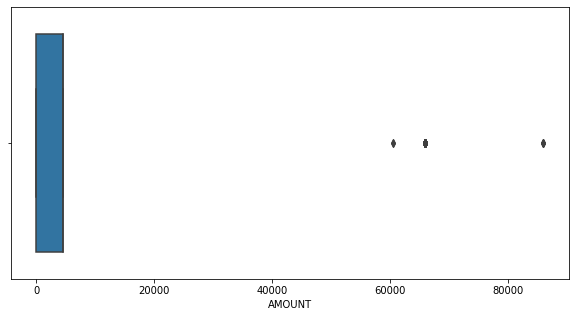

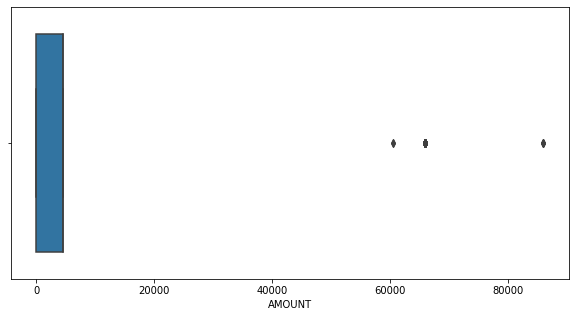

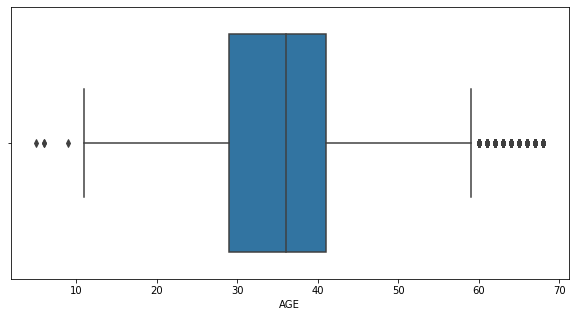

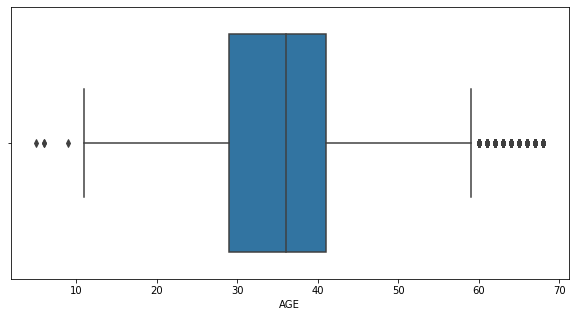

In [38]:
df_N_O_S_Mean = df_N.copy()
df_N_O_S_Median = df_N.copy()

# check mean and SD
#****************Standard Deviation Method outlier detection******************
for col in df_N_O_S_Mean:
    mean = df_N[col].mean()
    std = df_N[col].std()
    # identify outliers
    cut_off = std * 3
    lower, upper = mean - cut_off, mean + cut_off
    #values After removing Outliers 
    outliers_removed = [x for x in df_N_O_S_Mean[col] if x >= lower and x <= upper]
    #Calculating Mean after removing Outliers
    outliers_removed_mean=sta.mean(outliers_removed)
    print("*************************Mean Imputation****************")
    #Replacing Outliers with mean and median
    cnt = 0
    for row in df_N_O_S_Mean[col]:
        if(cnt == 19):
            cnt += 1
            continue
        if ((df_N_O_S_Mean.loc[cnt,col] > upper) or (df_N_O_S_Mean.loc[cnt,col] < lower)):
            df_N_O_S_Mean.loc[cnt,col] = outliers_removed_mean
        cnt = cnt+1
    plt.figure(figsize=(10,5))
    sns.boxplot(df_N_O_S_Mean[col])
    df_N_O_S_Mean[col].describe()
    
    print("*************************Median Imputation****************")
    outliers_removed_median=sta.median(outliers_removed)
    cnt = 0
    for row in df_N_O_S_Median[col]:
        if(cnt == 19):
            cnt += 1
            continue
        if ((df_N_O_S_Median.loc[cnt,col] > upper) or (df_N_O_S_Median.loc[cnt,col] < lower)):
            df_N_O_S_Median.loc[cnt,col] = outliers_removed_median
        cnt = cnt+1
    plt.figure(figsize=(10,5))
    sns.boxplot(df_N_O_S_Median[col])
    df_N_O_S_Median[col].describe()

In [39]:
df_N_O_S_Median.describe(include="all")

,AMOUNT,AGE
count,23703.000000,23703.000000
mean,2832.116103,35.895541
std,3442.283203,10.511265
min,0.000000,5.000000
25%,0.000000,29.000000
50%,4502.000000,36.000000
75%,4502.000000,41.000000
max,86000.000000,68.000000


In [40]:
df_N_O_S_Mean.describe(include="all")

,AMOUNT,AGE
count,23703.000000,23703.000000
mean,2827.240839,35.895009
std,3441.100432,10.511262
min,0.000000,5.000000
25%,0.000000,29.000000
50%,4502.000000,36.000000
75%,4502.000000,41.000000
max,86000.000000,68.000000


In [41]:

mean = df_N["AMOUNT"].mean()
std = df_N["AMOUNT"].std()

cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off
#values After removing Outliers 
outliers_removed = [x for x in df_N["AMOUNT"] if x >= lower and x <= upper]

#print(outliers_removed)
outliers = [x for x in df_N["AMOUNT"] if x <= lower and x >= upper]

print(outliers)

[]


In [42]:
#Removed OUTLIERS in AMOUNT Column
print(set(outliers_removed))

{0.0, 86000.0, 66000.0, 60500.0, 4502.0}


In [43]:

mean = df_N["AGE"].mean()
std = df_N["AGE"].std()

cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off
#values After removing Outliers 
outliers_removed = [x for x in df_N["AGE"] if x >= lower and x <= upper]

print(set(outliers_removed))
outliers = [x for x in df_N["AGE"] if x <= lower and x >= upper]

print(outliers)

{5.0, 6.0, 9.0, 11.0, 12.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0}
[]


In [44]:
df_N['AGE'].describe()

count    23703.000000
mean        36.026748
std         10.863501
min          1.000000
25%         29.000000
50%         36.000000
75%         41.000000
max        102.000000
Name: AGE, dtype: float64

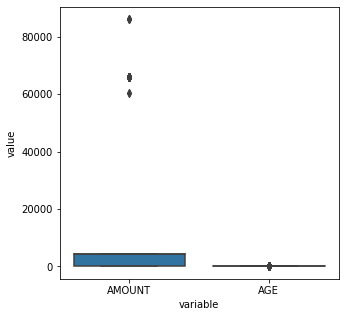

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(data = df_N_O_S_Mean)

plt.figure(figsize=(5,5))
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()

# Detecting Outliers using Z-Score and imputing using Mean and Median

2827.240839468562
1433.0754177520807


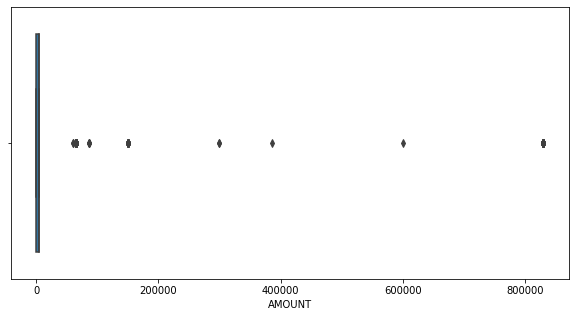

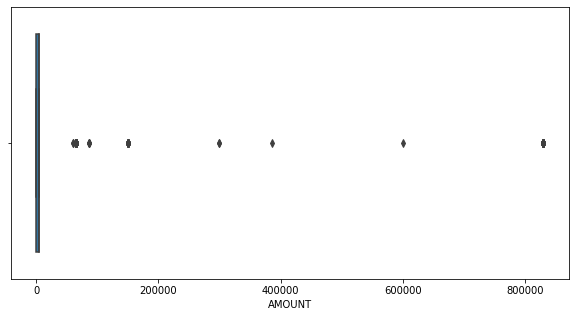

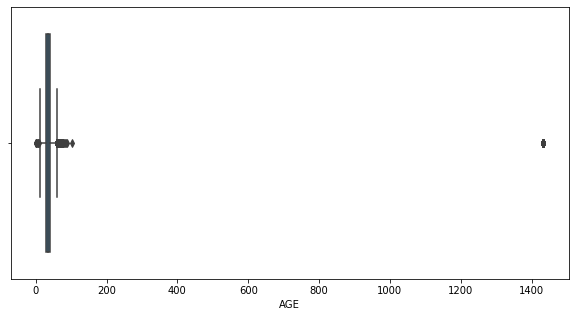

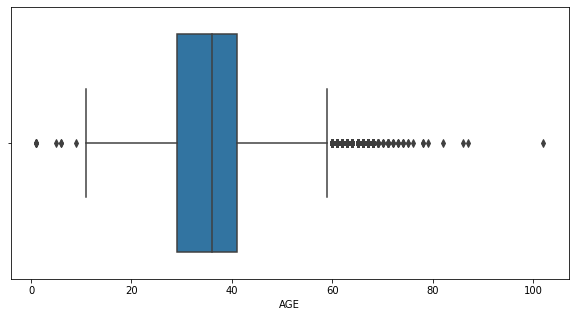

In [46]:
df_N_O_Z_Mean = df_N.copy()
df_N_O_Z_Median = df_N.copy()
import numpy as np
import pandas as pd
outliersRemoved=[]
threshold=3

for col in df_N_O_Z_Mean:
    mean_1 = np.mean(df_N_O_Z_Mean[col])
    std_1 =np.std(df_N_O_Z_Mean[col])

    for y in df_N_O_Z_Mean[col]:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) < threshold:
            outliersRemoved.append(y)
    outliersRemoved_Zmean = sta.mean(outliersRemoved)
    print(outliersRemoved_Zmean)
    cnt = 0
    
    for y in df_N_O_Z_Mean[col]:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            df_N_O_Z_Mean.loc[cnt,col] = outliersRemoved_Zmean
        cnt = cnt+1
    plt.figure(figsize=(10,5))
    sns.boxplot(df_N_O_Z_Mean[col])
    df_N_O_Z_Mean[col].describe()
    
    
    cnt =0 
    outliersRemoved_Zmedian = sta.median(outliersRemoved)
    for y in df_N_O_Z_Median[col]:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            df_N_O_Z_Median.loc[cnt,col] = outliersRemoved_Zmedian
        cnt = cnt+1
    plt.figure(figsize=(10,5))
    sns.boxplot(df_N_O_Z_Median[col])
    df_N_O_Z_Median[col].describe()

In [47]:
df_N_O_Z_Mean.describe(include="all")

,AMOUNT,AGE
count,23703.000000,23703.000000
mean,4067.100351,43.022320
std,30400.684766,99.726762
min,0.000000,1.000000
25%,0.000000,29.000000
50%,4502.000000,36.000000
75%,4502.000000,41.500000
max,830000.000000,1433.075418


In [48]:
df_N_O_Z_Median.describe(include="all")

,AMOUNT,AGE
count,23703.000000,23703.000000
mean,4071.975615,35.954478
std,30400.619828,10.627681
min,0.000000,1.000000
25%,0.000000,29.000000
50%,4502.000000,36.000000
75%,4502.000000,41.000000
max,830000.000000,102.000000


# Detecting Outlier Using IQR method and Imputating with  Mean and Median

In [49]:
#Interquartile Range Method---outlier detection 
df_N_O_IQR = df_N.copy()
df_N_O_IQR_Mean = df_N.copy()
df_N_O_IQR_Median = df_N.copy()

from numpy.random import seed
from numpy.random import randn
from numpy import percentile
# calculate interquartile range
#import numpy as np
from scipy.stats import iqr

for col in df_N_O_IQR:
    df_N_O_IQR[col]=sorted(df_N_O_IQR[col])

    q25 = df_N_O_IQR[col].quantile(0.25)
    q75 = df_N_O_IQR[col].quantile(0.75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = [x for x in df_N_O_IQR[col] if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    outliers_removed = [x for x in df_N_O_IQR[col] if x >= lower and x <= upper]
    #print('Non-outlier observations: %d' % len(outliers_removed))
    outliers_removed_MEAN = sta.mean(outliers_removed)
    cnt =0 
    for y in df_N_O_IQR[col]:
        if(cnt == 19):
            cnt += 1
            continue
        if ((df_N_O_IQR.loc[cnt,col] >= lower )and (df_N_O_IQR.loc[cnt,col] <= upper)):
            df_N_O_IQR_Mean.loc[cnt,col] = outliers_removed_MEAN
            cnt = cnt+1
    cnt =0
    outliers_removed_MEDIAN = sta.median(outliers_removed)
    for y in df_N_O_IQR[col]:
        if(cnt == 19):
            cnt += 1
            continue
        if ((df_N_O_IQR.loc[cnt,col] >= lower )and (df_N_O_IQR.loc[cnt,col] <= upper)):
            df_N_O_IQR_Median.loc[cnt,col] = outliers_removed_MEDIAN
            cnt = cnt+1

Percentiles: 25th=0.000, 75th=4502.000, IQR=4502.000
Identified outliers: 108
Percentiles: 25th=29.000, 75th=41.000, IQR=12.000
Identified outliers: 866


In [50]:
df_N_O_IQR_Mean.describe(include="all")

,AMOUNT,AGE
count,23703.000000,23703.000000
mean,2720.041429,36.026748
std,148.163680,10.863501
min,0.000000,1.000000
25%,2719.898707,29.000000
50%,2719.898707,36.000000
75%,2719.898707,41.000000
max,4502.000000,102.000000


In [51]:
df_N_O_IQR_Median.describe(include="all")

,AMOUNT,AGE
count,23703.000000,23703.000000
mean,4494.022782,36.026748
std,189.344428,10.863501
min,0.000000,1.000000
25%,4502.000000,29.000000
50%,4502.000000,36.000000
75%,4502.000000,41.000000
max,4502.000000,102.000000


In [52]:
df_N_O_Z_Mean_mean= df_N_O_Z_Mean.copy()
df_N_O_Z_Mean_median= df_N_O_Z_Mean.copy()
df_N_O_Z_Median_mean= df_N_O_Z_Median.copy()
df_N_O_Z_Median_median= df_N_O_Z_Median.copy()
df_N_O_S_Median_mean= df_N_O_S_Median.copy()
df_N_O_S_Median_median= df_N_O_S_Median.copy()
df_N_O_S_Mean_mean= df_N_O_S_Mean.copy()
df_N_O_S_Mean_median= df_N_O_S_Mean.copy()
df_N_O_IQR_Mean_Mean=df_N_O_IQR_Mean.copy()
df_N_O_IQR_Mean_Median=df_N_O_IQR_Mean.copy()
df_N_O_IQR_Median_Mean=df_N_O_IQR_Median.copy()
df_N_O_IQR_Median_Median=df_N_O_IQR_Median.copy()

# Missing value Imputation using mean 

In [53]:
#mean imputed 
for col in df_N_O_IQR_Mean_Mean:
    df_N_O_IQR_Mean_Mean[col] = df_N_O_IQR_Mean_Mean[col].fillna(df_N_O_IQR_Mean_Mean[col].mean()) 
df_N_O_IQR_Mean_Mean.describe(include="all")


,AMOUNT,AGE
count,23703.000000,23703.000000
mean,2720.041429,36.026748
std,148.163680,10.863501
min,0.000000,1.000000
25%,2719.898707,29.000000
50%,2719.898707,36.000000
75%,2719.898707,41.000000
max,4502.000000,102.000000


In [54]:
# Z-score mean imputed 
for col in df_N_O_Z_Mean_mean:
    df_N_O_Z_Mean_mean[col] = df_N_O_Z_Mean_mean[col].fillna(df_N_O_Z_Mean_mean[col].mean())
    df_N_O_Z_Mean_mean[col].unique()
    print(df_N_O_Z_Mean_mean[col].describe())

count     23703.000000
mean       4067.100351
std       30400.684766
min           0.000000
25%           0.000000
50%        4502.000000
75%        4502.000000
max      830000.000000
Name: AMOUNT, dtype: float64
count    23703.000000
mean        43.022320
std         99.726762
min          1.000000
25%         29.000000
50%         36.000000
75%         41.500000
max       1433.075418
Name: AGE, dtype: float64


In [55]:
# Z-score -  median imputed 
for col in df_N_O_Z_Median_mean:
    df_N_O_Z_Median_mean[col] = df_N_O_Z_Median_mean[col].fillna(df_N_O_Z_Median_mean[col].mean())
    df_N_O_Z_Median_mean[col].unique()
    print(df_N_O_Z_Median_mean[col].describe())

count     23703.000000
mean       4071.975615
std       30400.619828
min           0.000000
25%           0.000000
50%        4502.000000
75%        4502.000000
max      830000.000000
Name: AMOUNT, dtype: float64
count    23703.000000
mean        35.954478
std         10.627681
min          1.000000
25%         29.000000
50%         36.000000
75%         41.000000
max        102.000000
Name: AGE, dtype: float64


In [56]:
# statistic outlier - mean imputed 
for col in df_N_O_S_Mean_mean:
    df_N_O_S_Mean_mean[col] = df_N_O_S_Mean_mean[col].fillna(df_N_O_S_Mean_mean[col].mean())
    df_N_O_S_Mean_mean[col].unique()
    print(df_N_O_S_Mean_mean[col].describe())

count    23703.000000
mean      2827.240839
std       3441.100432
min          0.000000
25%          0.000000
50%       4502.000000
75%       4502.000000
max      86000.000000
Name: AMOUNT, dtype: float64
count    23703.000000
mean        35.895009
std         10.511262
min          5.000000
25%         29.000000
50%         36.000000
75%         41.000000
max         68.000000
Name: AGE, dtype: float64


In [57]:
# IOR outlier - mean imputed 
for col in df_N_O_IQR_Median_Mean:
    df_N_O_IQR_Median_Mean[col] = df_N_O_IQR_Median_Mean[col].fillna(df_N_O_IQR_Median_Mean[col].mean())
    df_N_O_IQR_Median_Mean[col].unique()
    print(df_N_O_IQR_Median_Mean[col].describe())


count    23703.000000
mean      4494.022782
std        189.344428
min          0.000000
25%       4502.000000
50%       4502.000000
75%       4502.000000
max       4502.000000
Name: AMOUNT, dtype: float64
count    23703.000000
mean        36.026748
std         10.863501
min          1.000000
25%         29.000000
50%         36.000000
75%         41.000000
max        102.000000
Name: AGE, dtype: float64


# Missing value Imputation using median 

In [58]:
#median imputed 
for col in df_N_O_IQR_Mean_Median:
    df_N_O_IQR_Mean_Median[col] = df_N_O_IQR_Mean_Median[col].fillna(df_N_O_IQR_Mean_Median[col].median())
df_N_O_IQR_Mean_Median.describe(include="all")

,AMOUNT,AGE
count,23703.000000,23703.000000
mean,2720.041429,36.026748
std,148.163680,10.863501
min,0.000000,1.000000
25%,2719.898707,29.000000
50%,2719.898707,36.000000
75%,2719.898707,41.000000
max,4502.000000,102.000000


In [59]:
# Z-score -  mean imputed 
for col in df_N_O_Z_Mean_median:
    df_N_O_Z_Mean_median[col] = df_N_O_Z_Mean_median[col].fillna(df_N_O_Z_Mean_median[col].median())
    df_N_O_Z_Mean_median[col].unique()
    print(df_N_O_Z_Mean_median[col].describe())

count     23703.000000
mean       4067.100351
std       30400.684766
min           0.000000
25%           0.000000
50%        4502.000000
75%        4502.000000
max      830000.000000
Name: AMOUNT, dtype: float64
count    23703.000000
mean        43.022320
std         99.726762
min          1.000000
25%         29.000000
50%         36.000000
75%         41.500000
max       1433.075418
Name: AGE, dtype: float64


In [60]:
# Z-score -  median imputed 
for col in df_N_O_Z_Median_median:
    df_N_O_Z_Median_median[col] = df_N_O_Z_Median_median[col].fillna(df_N_O_Z_Median_median[col].median())
df_N_O_Z_Median_median.describe(include="all")

,AMOUNT,AGE
count,23703.000000,23703.000000
mean,4071.975615,35.954478
std,30400.619828,10.627681
min,0.000000,1.000000
25%,0.000000,29.000000
50%,4502.000000,36.000000
75%,4502.000000,41.000000
max,830000.000000,102.000000


In [61]:
# statistic outlier - median imputed 
for col in df_N_O_S_Median_median:
    df_N_O_S_Median_median[col] = df_N_O_S_Median_median[col].fillna(df_N_O_S_Median_median[col].mean())
    df_N_O_S_Median_median[col].unique()
    print(df_N_O_S_Median_median[col].describe())


count    23703.000000
mean      2832.116103
std       3442.283203
min          0.000000
25%          0.000000
50%       4502.000000
75%       4502.000000
max      86000.000000
Name: AMOUNT, dtype: float64
count    23703.000000
mean        35.895541
std         10.511265
min          5.000000
25%         29.000000
50%         36.000000
75%         41.000000
max         68.000000
Name: AGE, dtype: float64


In [62]:
# statistic outlier - mean imputed 
for col in df_N_O_S_Mean_median:
    df_N_O_S_Mean_median[col] = df_N_O_S_Mean_median[col].fillna(df_N_O_S_Mean_median[col].median())
    df_N_O_S_Mean_median[col].unique()
    print(df_N_O_S_Mean_median[col].describe())

count    23703.000000
mean      2827.240839
std       3441.100432
min          0.000000
25%          0.000000
50%       4502.000000
75%       4502.000000
max      86000.000000
Name: AMOUNT, dtype: float64
count    23703.000000
mean        35.895009
std         10.511262
min          5.000000
25%         29.000000
50%         36.000000
75%         41.000000
max         68.000000
Name: AGE, dtype: float64


In [63]:
# sIOR outlier - meedian imputed 
for col in df_N_O_IQR_Mean_Median:
    df_N_O_IQR_Median_Median[col] = df_N_O_IQR_Median_Median[col].fillna(df_N_O_IQR_Median_Median[col].median())
    df_N_O_IQR_Median_Median[col].unique()
    print(df_N_O_IQR_Median_Median[col].describe())

count    23703.000000
mean      4494.022782
std        189.344428
min          0.000000
25%       4502.000000
50%       4502.000000
75%       4502.000000
max       4502.000000
Name: AMOUNT, dtype: float64
count    23703.000000
mean        36.026748
std         10.863501
min          1.000000
25%         29.000000
50%         36.000000
75%         41.000000
max        102.000000
Name: AGE, dtype: float64


In [64]:
List = [df_N_O_Z_Mean_mean,df_N_O_Z_Mean_median,df_N_O_Z_Median_mean,df_N_O_Z_Median_median,df_N_O_S_Median_mean,df_N_O_S_Median_median,df_N_O_S_Mean_mean,df_N_O_S_Mean_median,df_N_O_IQR_Mean_Mean,df_N_O_IQR_Mean_Median,df_N_O_IQR_Median_Mean,df_N_O_IQR_Median_Median]

In [65]:
df_N_O_Z_Mean_mean_N= df_N_O_Z_Mean_mean.copy()
df_N_O_Z_Mean_median_N= df_N_O_Z_Mean_median.copy()
df_N_O_Z_Median_mean_N= df_N_O_Z_Median_mean.copy()
df_N_O_Z_Median_median_N= df_N_O_Z_Median_median.copy()
df_N_O_S_Median_mean_N= df_N_O_S_Median_mean.copy()
df_N_O_S_Median_median_N= df_N_O_S_Median_median.copy()
df_N_O_S_Mean_mean_N= df_N_O_S_Mean_mean.copy()
df_N_O_S_Mean_median_N= df_N_O_S_Mean_median.copy()

df_N_O_IQR_Mean_Median_N=df_N_O_IQR_Mean_Median.copy()
df_N_O_IQR_Median_Mean_N=df_N_O_IQR_Median_Mean.copy()
df_N_O_IQR_Median_Median_N=df_N_O_IQR_Median_Median.copy()

In [66]:
df_N_O_IQR_Mean_Mean_L = df_N_O_IQR_Mean_Mean.copy()
df_N_O_IQR_Mean_Mean_L_N = df_N_O_IQR_Mean_Mean.copy()
df_N_O_IQR_Mean_Mean_L_N_S= df_N_O_IQR_Mean_Mean.copy()
df_N_O_IQR_Mean_Mean_S = df_N_O_IQR_Mean_Mean.copy()
df_N_O_IQR_Mean_Mean_S_N_S= df_N_O_IQR_Mean_Mean.copy()



In [67]:
df_N_O_IQR_Mean_Mean_L= np.log(df_N_O_IQR_Mean_Mean+1)
df_N_O_IQR_Mean_Mean_L.describe()

,AMOUNT,AGE
count,23703.000000,23703.000000
mean,7.896107,3.568058
std,0.333740,0.303026
min,0.000000,0.693147
25%,7.908718,3.401197
50%,7.908718,3.610918
75%,7.908718,3.737670
max,8.412499,4.634729


# Square root Transformation

In [68]:
df_N_O_IQR_Mean_Mean_S= np.sqrt(df_N_O_IQR_Mean_Mean)
df_N_O_IQR_Mean_Mean_S.describe()

,AMOUNT,AGE
count,23703.000000,23703.000000
mean,52.101849,5.934648
std,2.332160,0.898185
min,0.000000,1.000000
25%,52.152648,5.385165
50%,52.152648,6.000000
75%,52.152648,6.403124
max,67.096945,10.099505


# Normalization

In [69]:
upper = df_N_O_IQR_Mean_Mean_L .max()
lower = df_N_O_IQR_Mean_Mean_L .min()
df_N_O_IQR_Mean_Mean_L_N = (df_N_O_IQR_Mean_Mean_L - lower)/(upper-lower)
df_N_O_IQR_Mean_Mean_L_N.describe()

,AMOUNT,AGE
count,23703.000000,23703.000000
mean,0.938616,0.729380
std,0.039672,0.076879
min,0.000000,0.000000
25%,0.940115,0.687047
50%,0.940115,0.740254
75%,0.940115,0.772411
max,1.000000,1.000000


In [70]:
upper = df_N_O_IQR_Mean_Mean_S.max()
lower = df_N_O_IQR_Mean_Mean_S.min()
df_N_O_IQR_Mean_Mean_S_N = (df_N_O_IQR_Mean_Mean_S - lower)/(upper-lower)
df_N_O_IQR_Mean_Mean_S_N.describe()

,AMOUNT,AGE
count,23703.000000,23703.000000
mean,0.776516,0.542298
std,0.034758,0.098707
min,0.000000,0.000000
25%,0.777273,0.481912
50%,0.777273,0.549480
75%,0.777273,0.593782
max,1.000000,1.000000


# Standardization

In [71]:
from sklearn import preprocessing
# Get column names first
names = df_N_O_IQR_Mean_Mean_L_N.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df_N_O_IQR_Mean_Mean_L_N)
df_N_O_IQR_Mean_Mean_L_N_S = pd.DataFrame(scaled_df, columns=names)
df_N_O_IQR_Mean_Mean_L_N_S.describe()

,AMOUNT,AGE
count,2.370300e+04,2.370300e+04
mean,-1.269172e-14,-1.486231e-14
std,1.000021e+00,1.000021e+00
min,-2.365994e+01,-9.487546e+00
25%,3.778742e-02,-5.506591e-01
50%,3.778742e-02,1.414436e-01
75%,3.778742e-02,5.597392e-01
max,1.547321e+00,3.520142e+00


In [72]:
from sklearn import preprocessing
# Get column names first
names = df_N_O_IQR_Mean_Mean_S_N.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df_N_O_IQR_Mean_Mean_S_N)
df_N_O_IQR_Mean_Mean_S_N_S = pd.DataFrame(scaled_df, columns=names)
df_N_O_IQR_Mean_Mean_S_N_S.describe()

,AMOUNT,AGE
count,2.370300e+04,2.370300e+04
mean,7.892396e-15,1.766709e-15
std,1.000021e+00,1.000021e+00
min,-2.234107e+01,-5.494135e+00
25%,2.178239e-02,-6.117830e-01
50%,2.178239e-02,7.276178e-02
75%,2.178239e-02,5.215920e-01
max,6.429838e+00,4.637066e+00


# Sampling - Linear sampling

In [73]:
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm

In [74]:
# importing pandas package 
import pandas as pd 
  
# making data frame
  
# generating one row  
df1 = df_N_O_IQR_Mean_Mean_S_N_S.sample(frac =.8) 
  
# checking if sample is 0.25 times data or not 
  
if (0.8*(len(df_N_O_IQR_Mean_Mean_S_N_S))== len(df1)): 
    print(len(df_N_O_IQR_Mean_Mean_S_N_S), len(df1)) 
  
# display 
df1.head()


,AMOUNT,AGE
16961,0.021782,0.164908
3136,0.021782,0.521592
8556,0.021782,-0.115453
7809,0.021782,-0.211637
17531,0.021782,-1.153092


In [75]:
X = df1[["AMOUNT"]]
Y = df1[["AGE"]]

In [76]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


Intercept: 
 [-0.00100996]
Coefficients: 
 [[-0.00152558]]


In [77]:
df2 = df_N_O_IQR_Mean_Mean_S_N_S.drop(df1.index)
df2.head()
df3 = df2.drop(['AGE'],axis=1)

In [78]:
# prediction with sklearn

print ('Predicted Score \n', regr.predict(df3))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model) 

Predicted Score 
 [[-0.00104319]
 [-0.00104319]
 [-0.00104319]
 ...
 [-0.01081918]
 [-0.01081918]
 [-0.01081918]]
                            OLS Regression Results                            
Dep. Variable:                    AGE   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.04640
Date:                Mon, 04 Oct 2021   Prob (F-statistic):              0.829
Time:                        10:03:52   Log-Likelihood:                -26877.
No. Observations:               18962   AIC:                         5.376e+04
Df Residuals:                   18960   BIC:                         5.377e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------

In [79]:
#!pip install dalex


In [80]:
from sklearn.metrics import balanced_accuracy_score, roc_auc_score

In [82]:
#roc_auc_score(Y, model.predict_proba(X)[:, 1]).fit()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018C0FB07B08>]],
      dtype=object)

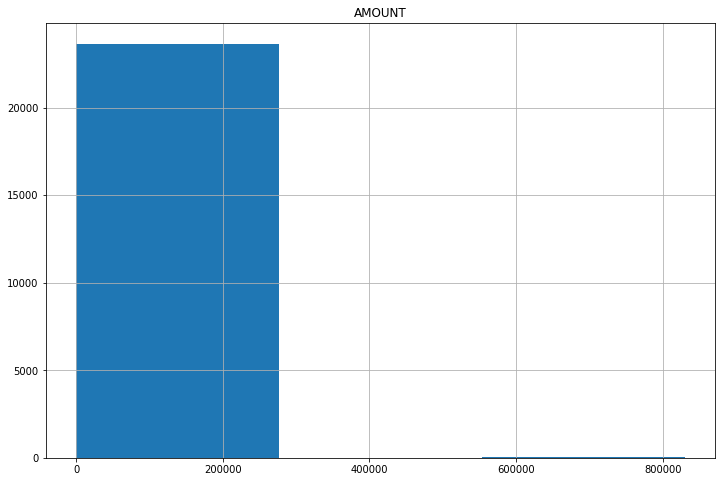

In [83]:
master.hist('AMOUNT', bins=3, figsize=(12,8))

In [84]:
bin_Amount = pd.cut(x = master['AMOUNT'],bins = 4)
bin_Age = pd.cut(x = master['AGE'],bins = [0,30,45,60,102])
#master.drop('BIN_I',axis  = 1,inplace = True)
master
master['AMOUNT_I'] = bin_Amount
master['AGE_I'] = bin_Age


# AGE Group vs AMOUNT Spending

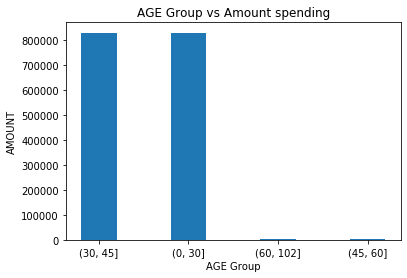

In [85]:
df_Interval = master[['AMOUNT','AGE_I']]
master['AGE_I'] = master['AGE_I'].astype(str)
plt.bar(master['AGE_I'],master['AMOUNT'],width = 0.4)
plt.xlabel("AGE Group")
plt.ylabel("AMOUNT")
plt.title("AGE Group vs Amount spending")
plt.show()

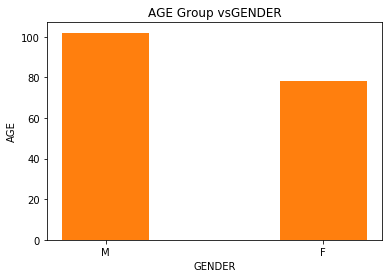

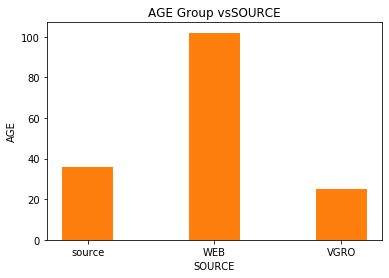

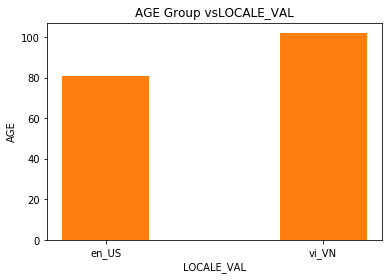

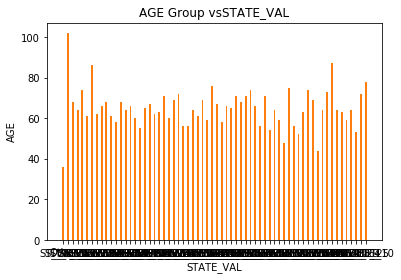

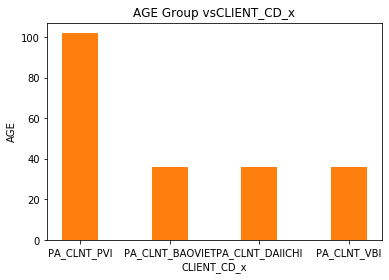

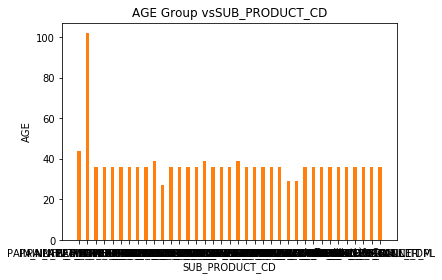

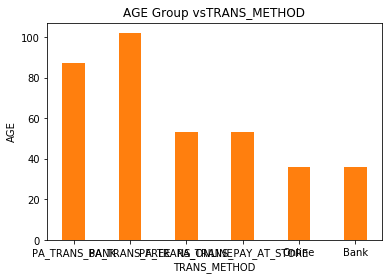

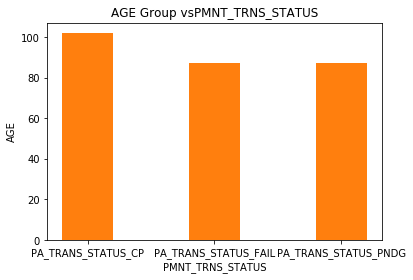

In [86]:
for col in df_c:
    plt.bar(master[col],master['AGE'],width = 0.4)
    plt.xlabel(col)
    plt.ylabel("AGE")
    plt.title(("AGE Group vs"+col))
    plt.bar(master[col],master['AGE'],width = 0.4)
    plt.show()

In [82]:
master.shape

(23703, 13)

In [83]:
set(master['SUB_PRODUCT_CD'])

{'BaoVietLìfeCare',
 'PAIN_HLT_CANCER_BR',
 'PAIN_HLT_CANCER_DM',
 'PAIN_HLT_CANCER_EC1',
 'PAIN_HLT_CANCER_EC2',
 'PAIN_HLT_CANCER_GL',
 'PAIN_HLT_CANCER_LFCARE',
 'PAIN_HLT_CANCER_PL',
 'PAIN_HLT_CANCER_SL',
 'PAIN_HLT_CANCER_TT',
 'PAIN_HLT_CRTCLILL_BR',
 'PAIN_HLT_CRTCLILL_DM',
 'PAIN_HLT_CRTCLILL_GL',
 'PAIN_HLT_CRTCLILL_SL',
 'PAIN_HLT_CRTCLILL_TT',
 'PAIN_HLT_HSPCSH_FMLY',
 'PAIN_HLT_HSPCSH_HSPCSH',
 'PAIN_HLT_HSPSRG_BRGIA',
 'PAIN_HLT_HSPSRG_DMGIA',
 'PAIN_HLT_HSPSRG_DMINT',
 'PAIN_HLT_HSPSRG_GLGIA',
 'PAIN_HLT_HSPSRG_PLGIA',
 'PAIN_HLT_HSPSRG_SELINT',
 'PAIN_HLT_HSPSRG_SLGIA',
 'PAIN_LIFE_EDMNT_BAOVIET',
 'PAIN_LIFE_EDMNT_DAICHI',
 'PAIN_LIFE_LIFEINV_BAOVIET',
 'PAIN_LIFE_LIFEINV_DAICHI',
 'PAIN_LIFE_LINV_PRU',
 'PAIN_NLIFE_ADLD_BR',
 'PAIN_NLIFE_IDTHFT_IDTHFT',
 'PAIN_NLIFE_PAD_PA100',
 'PAIN_NLIFE_PAD_PA100P',
 'PAIN_NLIFE_PAD_PA50',
 'PAIN_NLIFE_TWOWHL_BUNDLE',
 'PAIN_NLIFE_TWOWHL_PAK_C',
 'undefined'}

In [84]:
l1 = ['PAIN_NLIFE_ADLD_BR',
 'PAIN_NLIFE_IDTHFT_IDTHFT',
 'PAIN_NLIFE_PAD_PA100',
 'PAIN_NLIFE_PAD_PA100P',
 'PAIN_NLIFE_PAD_PA50',
 'PAIN_NLIFE_TWOWHL_BUNDLE',
 'PAIN_NLIFE_TWOWHL_PAK_C',]
master['SUB_PRODUCT_CD'].replace(l1,'PAIN_NLIFE',inplace = True)

In [85]:
master['SUB_PRODUCT_CD'].replace('undefined','PAIN_NLIFE',inplace = True)

# Data Partioning with Linear Sampling

In [86]:
import math
mean_Amount = master['AMOUNT'].mean()
master['AMOUNT'].replace(0,mean_Amount,inplace = True)

In [87]:
X = master.drop('SUB_PRODUCT_CD',axis = 1)
Y = master['SUB_PRODUCT_CD']

In [88]:
Y

0                      PAIN_NLIFE
1                      PAIN_NLIFE
2                      PAIN_NLIFE
3                      PAIN_NLIFE
4                      PAIN_NLIFE
                   ...           
23699                  PAIN_NLIFE
23700    PAIN_LIFE_LIFEINV_DAICHI
23701      PAIN_LIFE_EDMNT_DAICHI
23702      PAIN_LIFE_EDMNT_DAICHI
23703     PAIN_LIFE_EDMNT_BAOVIET
Name: SUB_PRODUCT_CD, Length: 23703, dtype: object

In [89]:
from sklearn.model_selection import train_test_split
X_Train,X_rem,Y_Train,Y_rem = train_test_split(X,Y,test_size = 0.4)
X_rem.shape

(9482, 12)

In [90]:
X_Test,X_Validate,Y_Test,Y_Validate = train_test_split(X_rem,Y_rem,test_size =0.25 )

In [91]:
#master.drop('CUST_ID',axis = 1,inplace = True)
X_Train.head(20)

,CUST_ID,GENDER,SOURCE,LOCALE_VAL,STATE_VAL,CLIENT_CD_x,TRANS_METHOD,PMNT_TRNS_STATUS,AMOUNT,AGE,AMOUNT_I,AGE_I
3822,1265,M,WEB,vi_VN,ST_VIET_63,PA_CLNT_PVI,PA_TRANS_FREE,PA_TRANS_STATUS_CP,4502.173143,50.0,"(-830.0, 207500.0]","(45, 60]"
11885,4762,F,WEB,vi_VN,ST_VIET_34,PA_CLNT_PVI,PA_TRANS_BANK,PA_TRANS_STATUS_FAIL,4502.000000,34.0,"(-830.0, 207500.0]","(30, 45]"
20527,7614,M,WEB,vi_VN,ST_VIET_7,PA_CLNT_PVI,PA_TRANS_BANK,PA_TRANS_STATUS_FAIL,4502.000000,50.0,"(-830.0, 207500.0]","(45, 60]"
21743,8018,F,WEB,vi_VN,ST_VIET_50,PA_CLNT_PVI,PA_TRANS_BANK,PA_TRANS_STATUS_FAIL,4502.000000,34.0,"(-830.0, 207500.0]","(30, 45]"
4212,1618,M,WEB,en_US,ST_VIET_50,PA_CLNT_PVI,PA_TRANS_BANK,PA_TRANS_STATUS_CP,4502.000000,36.0,"(-830.0, 207500.0]","(30, 45]"
19865,7419,M,WEB,vi_VN,ST_VIET_36,PA_CLNT_PVI,PA_TRANS_FREE,PA_TRANS_STATUS_CP,4502.173143,31.0,"(-830.0, 207500.0]","(30, 45]"
13359,5290,M,WEB,vi_VN,ST_VIET_24,PA_CLNT_PVI,PA_TRANS_BANK,PA_TRANS_STATUS_FAIL,4502.000000,21.0,"(-830.0, 207500.0]","(0, 30]"
15675,6053,M,WEB,vi_VN,ST_VIET_17,PA_CLNT_PVI,PA_TRANS_BANK,PA_TRANS_STATUS_FAIL,4502.000000,18.0,"(-830.0, 207500.0]","(0, 30]"
5768,2516,F,WEB,vi_VN,ST_VIET_50,PA_CLNT_PVI,PA_TRANS_BANK,PA_TRANS_STATUS_FAIL,4502.000000,28.0,"(-830.0, 207500.0]","(0, 30]"
18512,6989,M,WEB,vi_VN,ST_VIET_47,PA_CLNT_PVI,PA_TRANS_FREE,PA_TRANS_STATUS_CP,4502.173143,31.0,"(-830.0, 207500.0]","(30, 45]"


# Random Forest Feature Selection

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [93]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 50))
sel.fit(X_Train, Y_Train)

ValueError: could not convert string to float: 'M'

In [94]:
#master.to_excel("some.xlsx")
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)


In [95]:
dup = master.copy()
dup

,CUST_ID,GENDER,SOURCE,LOCALE_VAL,STATE_VAL,CLIENT_CD_x,SUB_PRODUCT_CD,TRANS_METHOD,PMNT_TRNS_STATUS,AMOUNT,AGE,AMOUNT_I,AGE_I
0,1,M,source,en_US,Other,PA_CLNT_PVI,PAIN_NLIFE,PA_TRANS_BANK,PA_TRANS_STATUS_CP,4502.0,36.0,"(-830.0, 207500.0]","(30, 45]"
1,2,F,WEB,en_US,Other,PA_CLNT_PVI,PAIN_NLIFE,PA_TRANS_BANK,PA_TRANS_STATUS_CP,4502.0,33.0,"(-830.0, 207500.0]","(30, 45]"
2,3,M,WEB,en_US,Other,PA_CLNT_PVI,PAIN_NLIFE,PA_TRANS_BANK,PA_TRANS_STATUS_CP,4502.0,34.0,"(-830.0, 207500.0]","(30, 45]"
3,4,M,WEB,en_US,Other,PA_CLNT_PVI,PAIN_NLIFE,PA_TRANS_BANK,PA_TRANS_STATUS_CP,4502.0,1.0,"(-830.0, 207500.0]","(0, 30]"
4,5,M,WEB,en_US,ST_VIET_50,PA_CLNT_PVI,PAIN_NLIFE,PA_TRANS_BANK,PA_TRANS_STATUS_CP,4502.0,36.0,"(-830.0, 207500.0]","(30, 45]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23699,115,M,WEB,vi_VN,ST_VIET_50,PA_CLNT_PVI,PAIN_NLIFE,PA_TRANS_BANK,PA_TRANS_STATUS_CP,4502.0,36.0,"(-830.0, 207500.0]","(30, 45]"
23700,123,M,WEB,vi_VN,ST_VIET_50,PA_CLNT_PVI,PAIN_LIFE_LIFEINV_DAICHI,PA_TRANS_BANK,PA_TRANS_STATUS_CP,4502.0,36.0,"(-830.0, 207500.0]","(30, 45]"
23701,123,M,WEB,vi_VN,ST_VIET_50,PA_CLNT_PVI,PAIN_LIFE_EDMNT_DAICHI,PA_TRANS_BANK,PA_TRANS_STATUS_CP,4502.0,36.0,"(-830.0, 207500.0]","(30, 45]"
23702,170,M,WEB,vi_VN,ST_VIET_50,PA_CLNT_PVI,PAIN_LIFE_EDMNT_DAICHI,PA_TRANS_BANK,PA_TRANS_STATUS_CP,4502.0,36.0,"(-830.0, 207500.0]","(30, 45]"


In [96]:
dup['GENDER'].replace({'M':1,'F':0},inplace = True)
print(set(dup['SOURCE']))
dup['SOURCE'].replace("M0003", "WEB",inplace = True)

{'WEB', 'source', 'VGRO'}


In [97]:
dup['SOURCE'].replace({'VGRO':0,'source':1,'WEB':2},inplace = True)

In [98]:
dup['LOCALE_VAL'].replace({'en_US':0,'vi_VN':1},inplace = True)

In [99]:
c = 0
for i in set(dup['STATE_VAL']):
    dup['STATE_VAL'].replace(i,c,inplace = True)
    c += 1

In [100]:
dup
Y

0                      PAIN_NLIFE
1                      PAIN_NLIFE
2                      PAIN_NLIFE
3                      PAIN_NLIFE
4                      PAIN_NLIFE
                   ...           
23699                  PAIN_NLIFE
23700    PAIN_LIFE_LIFEINV_DAICHI
23701      PAIN_LIFE_EDMNT_DAICHI
23702      PAIN_LIFE_EDMNT_DAICHI
23703     PAIN_LIFE_EDMNT_BAOVIET
Name: SUB_PRODUCT_CD, Length: 23703, dtype: object

In [101]:
c = 0
for i in set(dup['PMNT_TRNS_STATUS']):
    dup['PMNT_TRNS_STATUS'].replace(i,c,inplace = True)
    c += 1

In [102]:
dup

,CUST_ID,GENDER,SOURCE,LOCALE_VAL,STATE_VAL,CLIENT_CD_x,SUB_PRODUCT_CD,TRANS_METHOD,PMNT_TRNS_STATUS,AMOUNT,AGE,AMOUNT_I,AGE_I
0,1,1,1,0,27,PA_CLNT_PVI,PAIN_NLIFE,PA_TRANS_BANK,1,4502.0,36.0,"(-830.0, 207500.0]","(30, 45]"
1,2,0,2,0,27,PA_CLNT_PVI,PAIN_NLIFE,PA_TRANS_BANK,1,4502.0,33.0,"(-830.0, 207500.0]","(30, 45]"
2,3,1,2,0,27,PA_CLNT_PVI,PAIN_NLIFE,PA_TRANS_BANK,1,4502.0,34.0,"(-830.0, 207500.0]","(30, 45]"
3,4,1,2,0,27,PA_CLNT_PVI,PAIN_NLIFE,PA_TRANS_BANK,1,4502.0,1.0,"(-830.0, 207500.0]","(0, 30]"
4,5,1,2,0,9,PA_CLNT_PVI,PAIN_NLIFE,PA_TRANS_BANK,1,4502.0,36.0,"(-830.0, 207500.0]","(30, 45]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23699,115,1,2,1,9,PA_CLNT_PVI,PAIN_NLIFE,PA_TRANS_BANK,1,4502.0,36.0,"(-830.0, 207500.0]","(30, 45]"
23700,123,1,2,1,9,PA_CLNT_PVI,PAIN_LIFE_LIFEINV_DAICHI,PA_TRANS_BANK,1,4502.0,36.0,"(-830.0, 207500.0]","(30, 45]"
23701,123,1,2,1,9,PA_CLNT_PVI,PAIN_LIFE_EDMNT_DAICHI,PA_TRANS_BANK,1,4502.0,36.0,"(-830.0, 207500.0]","(30, 45]"
23702,170,1,2,1,9,PA_CLNT_PVI,PAIN_LIFE_EDMNT_DAICHI,PA_TRANS_BANK,1,4502.0,36.0,"(-830.0, 207500.0]","(30, 45]"


In [103]:
X = dup.drop(['SUB_PRODUCT_CD','AMOUNT_I','AGE_I'],axis = 1)
y = dup['SUB_PRODUCT_CD']

In [104]:
#X['GENDER'].replace({'M':1,'F':0},inplace = True)
y

0                      PAIN_NLIFE
1                      PAIN_NLIFE
2                      PAIN_NLIFE
3                      PAIN_NLIFE
4                      PAIN_NLIFE
                   ...           
23699                  PAIN_NLIFE
23700    PAIN_LIFE_LIFEINV_DAICHI
23701      PAIN_LIFE_EDMNT_DAICHI
23702      PAIN_LIFE_EDMNT_DAICHI
23703     PAIN_LIFE_EDMNT_BAOVIET
Name: SUB_PRODUCT_CD, Length: 23703, dtype: object

In [105]:
c = 0
for i in set(X['STATE_VAL']):
    X['STATE_VAL'].replace(i,c,inplace = True)
    c += 1

In [106]:
c = 0
for i in set(X['CLIENT_CD_x']):
    X['CLIENT_CD_x'].replace(i,c,inplace = True)
    c += 1

In [107]:
c = 0
for i in set(X['STATE_VAL']):
    X['STATE_VAL'].replace(i,c,inplace = True)
    c += 1

In [108]:
c = 0
for i in set(X['TRANS_METHOD']):
    X['TRANS_METHOD'].replace(i,c,inplace = True)
    c += 1

In [109]:
X

,CUST_ID,GENDER,SOURCE,LOCALE_VAL,STATE_VAL,CLIENT_CD_x,TRANS_METHOD,PMNT_TRNS_STATUS,AMOUNT,AGE
0,1,1,1,0,27,0,2,1,4502.0,36.0
1,2,0,2,0,27,0,2,1,4502.0,33.0
2,3,1,2,0,27,0,2,1,4502.0,34.0
3,4,1,2,0,27,0,2,1,4502.0,1.0
4,5,1,2,0,9,0,2,1,4502.0,36.0
...,...,...,...,...,...,...,...,...,...,...
23699,115,1,2,1,9,0,2,1,4502.0,36.0
23700,123,1,2,1,9,0,2,1,4502.0,36.0
23701,123,1,2,1,9,0,2,1,4502.0,36.0
23702,170,1,2,1,9,0,2,1,4502.0,36.0


In [110]:
y = Y
set(y)
set(master['SUB_PRODUCT_CD'])
y

0                      PAIN_NLIFE
1                      PAIN_NLIFE
2                      PAIN_NLIFE
3                      PAIN_NLIFE
4                      PAIN_NLIFE
                   ...           
23699                  PAIN_NLIFE
23700    PAIN_LIFE_LIFEINV_DAICHI
23701      PAIN_LIFE_EDMNT_DAICHI
23702      PAIN_LIFE_EDMNT_DAICHI
23703     PAIN_LIFE_EDMNT_BAOVIET
Name: SUB_PRODUCT_CD, Length: 23703, dtype: object

In [111]:
y.replace(['PAIN_HLT_CANCER_BR',
 'PAIN_HLT_CANCER_DM',
 'PAIN_HLT_CANCER_EC1',
 'PAIN_HLT_CANCER_EC2',
 'PAIN_HLT_CANCER_GL',
 'PAIN_HLT_CANCER_LFCARE',
 'PAIN_HLT_CANCER_PL',
 'PAIN_HLT_CANCER_SL',
 'PAIN_HLT_CANCER_TT'],'PAIN_HLT_CANCER',inplace = True)

In [112]:
y.replace(['PAIN_HLT_CRTCLILL_BR',
 'PAIN_HLT_CRTCLILL_DM',
 'PAIN_HLT_CRTCLILL_GL',
 'PAIN_HLT_CRTCLILL_SL',
 'PAIN_HLT_CRTCLILL_TT'],'PAIN_HLT_CRTCLILL',inplace = True)

In [113]:
y.replace(['PAIN_HLT_HSPCSH_FMLY',
 'PAIN_HLT_HSPCSH_HSPCSH'],'PAIN_HTL_HSPCSH',inplace = True)

In [114]:
y.replace(['PAIN_HLT_HSPSRG_BRGIA',
 'PAIN_HLT_HSPSRG_DMGIA',
 'PAIN_HLT_HSPSRG_DMINT',
 'PAIN_HLT_HSPSRG_GLGIA',
 'PAIN_HLT_HSPSRG_PLGIA',
 'PAIN_HLT_HSPSRG_SELINT',
 'PAIN_HLT_HSPSRG_SLGIA'],'PAIN_HLT_HSPSRG',inplace = True)

In [115]:
y.replace(['PAIN_LIFE_EDMNT_BAOVIET',
 'PAIN_LIFE_EDMNT_DAICHI',
 'PAIN_LIFE_LIFEINV_BAOVIET',
 'PAIN_LIFE_LIFEINV_DAICHI',
 'PAIN_LIFE_LINV_PRU'],'PAIN_LIFE',inplace = True)

In [116]:
set(y)


{'BaoVietLìfeCare',
 'PAIN_HLT_CANCER',
 'PAIN_HLT_CRTCLILL',
 'PAIN_HLT_HSPSRG',
 'PAIN_HTL_HSPCSH',
 'PAIN_LIFE',
 'PAIN_NLIFE'}

In [117]:
c = 0
for i in set(y):
    y.replace(i,c,inplace = True)
    c += 1

In [119]:
y.replace('undefined','PAIN_NLIFE',inplace = True)

In [120]:
from sklearn.model_selection import train_test_split
X_Train,X_rem,Y_Train,Y_rem = train_test_split(X,y,test_size = 0.4,random_state = 42,shuffle = True)
X_rem.shape
X_Test,X_Validate,Y_Test,Y_Validate = train_test_split(X_rem,Y_rem,test_size =0.25 )

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
sel = RandomForestClassifier(n_estimators = 50)
sel.fit(X_Train, Y_Train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [122]:
importance = sel.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.31805
Feature: 1, Score: 0.01472
Feature: 2, Score: 0.01336
Feature: 3, Score: 0.05785
Feature: 4, Score: 0.06566
Feature: 5, Score: 0.31660
Feature: 6, Score: 0.04493
Feature: 7, Score: 0.01718
Feature: 8, Score: 0.00704
Feature: 9, Score: 0.14462


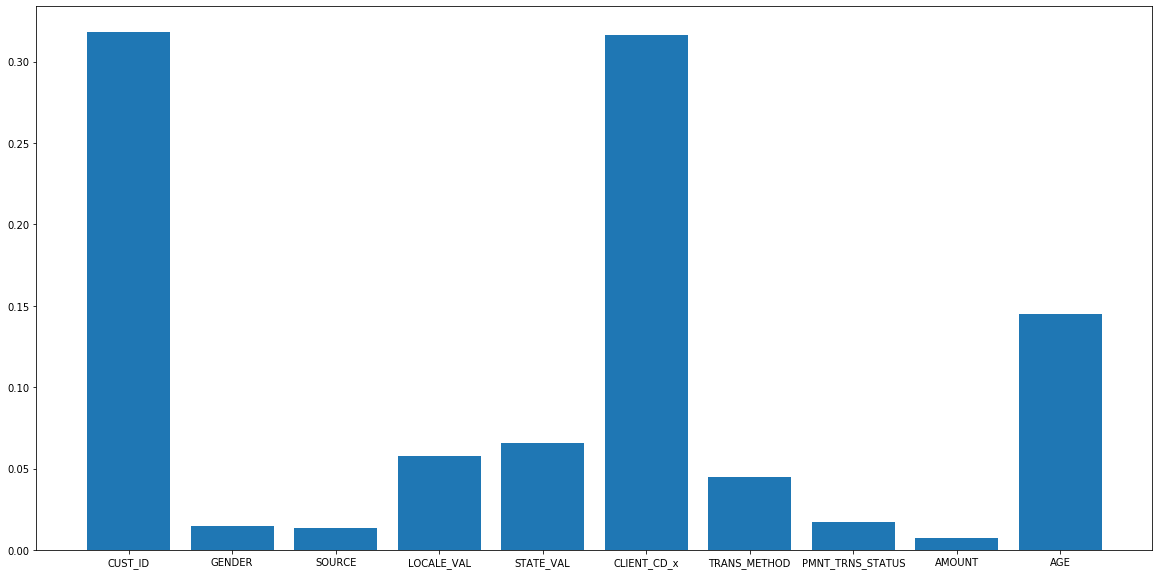

In [123]:
plt.figure(figsize = (20,10))
plt.bar(X.columns, importance)
plt.show()

In [124]:
model = RandomForestClassifier(n_estimators = 50)
model.fit(X_Train,Y_Train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [125]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_Test)
print(accuracy_score(pred,Y_Test))

0.956686823231613


In [126]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(pred,Y_Test))

[[6625    2    4    1   92   36   73]
 [   0    0    0    0    0    0    0]
 [   0    0   65    0    0    0    0]
 [   4    0   37   51    3    1    2]
 [  24    0    0    0   10    1    0]
 [   1    0    0    4    5   51    7]
 [   6    0    0    1    2    2    1]]


# Feature Selection by Extra Tree Classifier

In [127]:
from sklearn.ensemble import ExtraTreesClassifier

In [128]:
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
  
extra_tree_forest.fit(X_Train, Y_Train)
  
feature_importance = extra_tree_forest.feature_importances_

feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

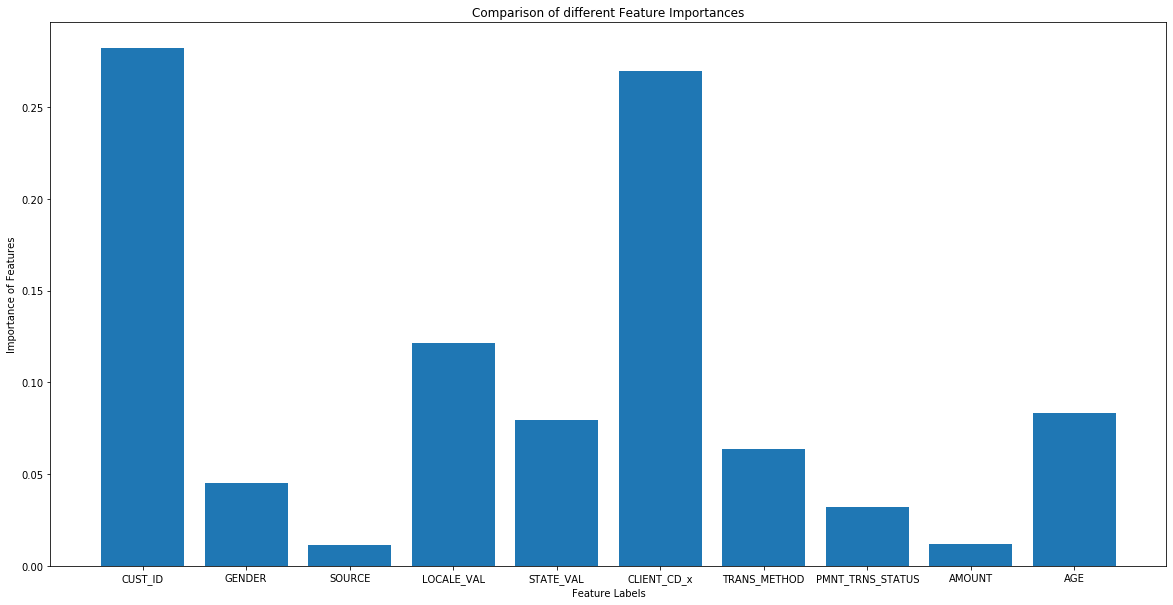

In [129]:

# Plotting a Bar Graph to compare the models without normalization
plt.figure(figsize = (20,10))
plt.bar(X.columns, feature_importance)
plt.xlabel('Feature Labels')
plt.ylabel("Importance of Features")
plt.title('Comparison of different Feature Importances')
plt.show()

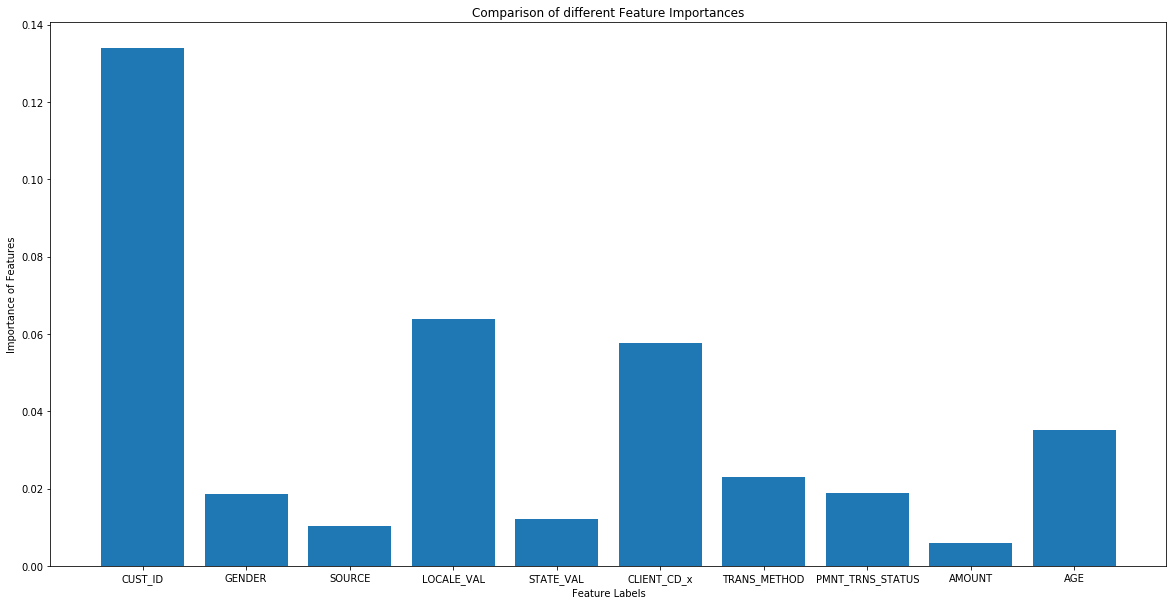

In [130]:
plt.figure(figsize = (20,10))
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel("Importance of Features")
plt.title('Comparison of different Feature Importances')
plt.show()

# Feature Selection using Chi-Squared Test

In [131]:
from sklearn.feature_selection import chi2

In [132]:
chi_scores = chi2(X,y)

In [133]:
chi_scores

(array([5.95773867e+06, 1.56725801e+02, 3.92560118e-01, 6.94691563e+02,
        5.15232808e+03, 5.01847630e+04, 1.71784428e+03, 4.41309843e+02,
        7.87735334e+05, 6.58470285e+03]),
 array([0.00000000e+000, 2.92212445e-031, 9.98911416e-001, 8.56324576e-147,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 3.64014539e-092,
        0.00000000e+000, 0.00000000e+000]))

In [134]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

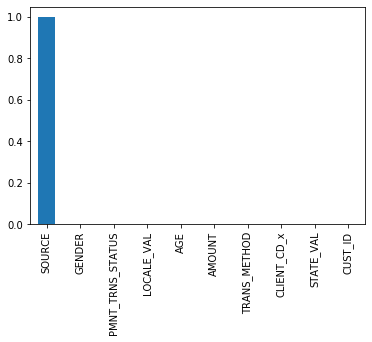

In [135]:
p_values.plot.bar()

In [136]:
from sklearn.feature_selection import SelectKBest
test = SelectKBest(score_func=chi2, k=3)
fit = test.fit(X, y)
fit.scores_

array([5.95773867e+06, 1.56725801e+02, 3.92560118e-01, 6.94691563e+02,
       5.15232808e+03, 5.01847630e+04, 1.71784428e+03, 4.41309843e+02,
       7.87735334e+05, 6.58470285e+03])

In [137]:
X_new=test.fit_transform(X, y)

In [138]:
print(X_new)

[[1 0 4502.0]
 [2 0 4502.0]
 [3 0 4502.0]
 ...
 [123 0 4502.0]
 [170 0 4502.0]
 [170 0 4502.0]]


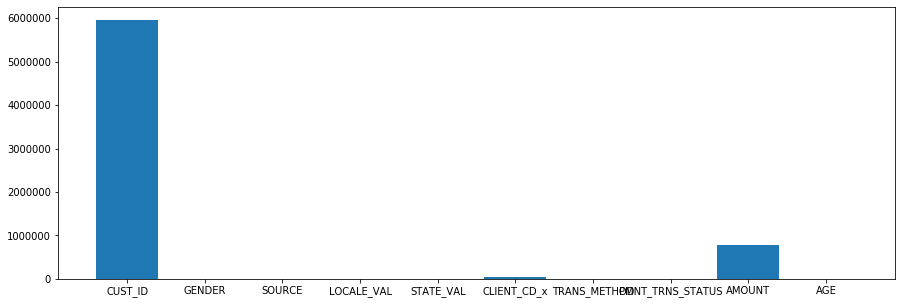

In [139]:
plt.figure(figsize = (15,5))
plt.bar(X.columns,fit.scores_)
plt.show()

In [408]:
#df.drop(columns = ['Unnamed: 0','STATUS','AGE'],inplace = True)
df.to_excel("Data_Before_Encoding.xlsx")

AttributeError: 'DataFrame' object has no attribute 'concat'

# Random Forest Classifier All Iterations

# Iteration 1 (All Features Included)

In [388]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
sel = RandomForestClassifier(n_estimators = 50)
sel.fit(X_Train, Y_Train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [387]:
X_Train.drop(columns = ['STATUS'],inplace = True)

In [395]:
y_pred = sel.predict(X_Test)

ValueError: Number of features of the model must match the input. Model n_features is 10 and input n_features is 11 

In [389]:
accuracy_score(Y_Test,y_pred)

0.5561805653213332

In [390]:
confusion_matrix(Y_Test, y_pred)

array([[1879,  254],
       [2902, 2076]], dtype=int64)

In [391]:
print(classification_report(Y_Test, y_pred))

              precision    recall  f1-score   support

           0       0.39      0.88      0.54      2133
           1       0.89      0.42      0.57      4978

    accuracy                           0.56      7111
   macro avg       0.64      0.65      0.56      7111
weighted avg       0.74      0.56      0.56      7111



In [392]:
import pickle
filename = "RandomForest3.pkl"
outfile = open(filename,'wb')
pickle.dump(sel,outfile)
outfile.close()

In [393]:
X_train

,GENDER,SOURCE,LOCALE_VAL,STATE_VAL,CLIENT_CD_x,SUB_PRODUCT_CD,TRANS_METHOD,PMNT_TRNS_STATUS,STATUS,AMOUNT_I,AGE_I
419,1,0,1,46,2,6,4,1,0,0,0
9933,1,1,1,31,2,6,3,0,0,0,0
2263,1,1,0,46,2,6,2,1,0,0,0
11801,1,1,1,40,2,6,3,0,0,0,1
6752,1,1,1,46,2,6,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
22118,0,1,1,47,2,6,3,0,0,0,1
11284,1,1,1,25,2,6,2,2,1,0,2
21575,0,1,1,19,2,6,3,0,0,0,1
15795,0,1,1,46,2,6,3,0,0,0,1


# Random Forest Regression with top 8

In [248]:
importance = sel.feature_importances_

In [249]:
importance

array([2.56346998e-02, 1.81106790e-02, 1.64344291e-01, 5.34241817e-01,
       4.09892583e-03, 1.90494893e-02, 8.18099640e-02, 6.75165008e-02,
       1.64722097e-02, 2.93871161e-04, 6.84275533e-02])

In [294]:
d = {}
li = list(X.columns)
for i in range(len(importance)):
    d[importance[i]] = li[i]
col = []
print(d.keys())
#for i in sorted(d.keys()):
for i in d.keys():
    col.append(float("{:.3f}".format(i)))
print([a for a in range(11)])
col

dict_keys([0.02563469984761906, 0.01811067902152664, 0.16434429055429886, 0.5342418165101019, 0.004098925830198191, 0.0190494893489223, 0.08180996402287476, 0.06751650075222511, 0.01647220969216976, 0.000293871161140396, 0.06842755325892318])
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


[0.026, 0.018, 0.164, 0.534, 0.004, 0.019, 0.082, 0.068, 0.016, 0.0, 0.068]

In [296]:
p = [3, 2, 6, 7, 10, 0, 5, 1]
col = []
for i in p:
    col.append(li[i])
col

['STATE_VAL',
 'LOCALE_VAL',
 'TRANS_METHOD',
 'PMNT_TRNS_STATUS',
 'AGE_I',
 'GENDER',
 'SUB_PRODUCT_CD',
 'SOURCE']

In [149]:
imp = imp[::-1]
col = col[::-1]

In [303]:
top8 = col[:8]

In [304]:
X_Train_8 = X_Train[list(top8)]

In [305]:
X_Test_8 = X_Test[list(top8)]

In [306]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
sel = RandomForestClassifier(n_estimators = 50)
sel.fit(X_Train_8, Y_Train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [307]:
y_pred = sel.predict(X_Test_8)
print(accuracy_score(Y_Test,y_pred))
print(confusion_matrix(Y_Test, y_pred))
print(classification_report(Y_Test, y_pred))

0.5505554774293349
[[1899  234]
 [2962 2016]]
              precision    recall  f1-score   support

           0       0.39      0.89      0.54      2133
           1       0.90      0.40      0.56      4978

    accuracy                           0.55      7111
   macro avg       0.64      0.65      0.55      7111
weighted avg       0.74      0.55      0.55      7111



# Iteration 3 ( Top 7 Columns)

In [308]:
top7 = col[:7]
X_Train_7 = X_Train[list(top7)]
X_Test_7 = X_Test[list(top7)]
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
sel = RandomForestClassifier(n_estimators = 50)
sel.fit(X_Train_7, Y_Train)
y_pred = sel.predict(X_Test_7)
print(accuracy_score(Y_Test,y_pred))
print(confusion_matrix(Y_Test, y_pred))
print(classification_report(Y_Test, y_pred))

0.5513992406131346
[[1899  234]
 [2956 2022]]
              precision    recall  f1-score   support

           0       0.39      0.89      0.54      2133
           1       0.90      0.41      0.56      4978

    accuracy                           0.55      7111
   macro avg       0.64      0.65      0.55      7111
weighted avg       0.74      0.55      0.55      7111



# Iteration 4 (Top 6 Columns)

In [309]:
top6 = col[:6]
X_Train_6 = X_Train[list(top6)]
X_Test_6 = X_Test[list(top6)]
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
sel = RandomForestClassifier(n_estimators = 50)
sel.fit(X_Train_6, Y_Train)
y_pred = sel.predict(X_Test_6)
print(accuracy_score(Y_Test,y_pred))
print(confusion_matrix(Y_Test, y_pred))
print(classification_report(Y_Test, y_pred))

0.5476023062860357
[[1908  225]
 [2992 1986]]
              precision    recall  f1-score   support

           0       0.39      0.89      0.54      2133
           1       0.90      0.40      0.55      4978

    accuracy                           0.55      7111
   macro avg       0.64      0.65      0.55      7111
weighted avg       0.75      0.55      0.55      7111



# Iteration 5 (Top 5 Features)

In [310]:
top5 = col[:5]
X_Train_5 = X_Train[list(top5)]
X_Test_5 = X_Test[list(top5)]
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
sel = RandomForestClassifier(n_estimators = 50)
sel.fit(X_Train_5, Y_Train)
y_pred = sel.predict(X_Test_5)
print(accuracy_score(Y_Test,y_pred))
print(confusion_matrix(Y_Test, y_pred))
print(classification_report(Y_Test, y_pred))

0.529883279426241
[[1922  211]
 [3132 1846]]
              precision    recall  f1-score   support

           0       0.38      0.90      0.53      2133
           1       0.90      0.37      0.52      4978

    accuracy                           0.53      7111
   macro avg       0.64      0.64      0.53      7111
weighted avg       0.74      0.53      0.53      7111



# Extra tree Classifier All Iterations

# Iteration 1 ( All Features Included)

In [340]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
  
extra_tree_forest.fit(X_Train, Y_Train)
  
feature_importance = extra_tree_forest.feature_importances_

feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)
y_pred = extra_tree_forest.predict(X_Test)
print(accuracy_score(Y_Test,y_pred))
print(confusion_matrix(Y_Test, y_pred))
print(classification_report(Y_Test, y_pred))

0.5556180565321334
[[1883  250]
 [2910 2068]]
              precision    recall  f1-score   support

           0       0.39      0.88      0.54      2133
           1       0.89      0.42      0.57      4978

    accuracy                           0.56      7111
   macro avg       0.64      0.65      0.56      7111
weighted avg       0.74      0.56      0.56      7111



# Iteration 2 (Top 8 Features)

In [341]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
  
extra_tree_forest.fit(X_Train_8, Y_Train)
  
feature_importance = extra_tree_forest.feature_importances_

feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)
y_pred = extra_tree_forest.predict(X_Test_8)
print(accuracy_score(Y_Test,y_pred))
print(confusion_matrix(Y_Test, y_pred))
print(classification_report(Y_Test, y_pred))

0.5490085782590353
[[1903  230]
 [2977 2001]]
              precision    recall  f1-score   support

           0       0.39      0.89      0.54      2133
           1       0.90      0.40      0.56      4978

    accuracy                           0.55      7111
   macro avg       0.64      0.65      0.55      7111
weighted avg       0.74      0.55      0.55      7111



# Iteration 3 (Top 7 Features Included)

In [342]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
  
extra_tree_forest.fit(X_Train_7, Y_Train)
  
feature_importance = extra_tree_forest.feature_importances_

feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)
y_pred = extra_tree_forest.predict(X_Test_7)
print(accuracy_score(Y_Test,y_pred))
print(confusion_matrix(Y_Test, y_pred))
print(classification_report(Y_Test, y_pred))

0.5492898326536352
[[1905  228]
 [2977 2001]]
              precision    recall  f1-score   support

           0       0.39      0.89      0.54      2133
           1       0.90      0.40      0.56      4978

    accuracy                           0.55      7111
   macro avg       0.64      0.65      0.55      7111
weighted avg       0.75      0.55      0.55      7111



# Iteration 4 (Top 6 Features Included)

In [343]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
  
extra_tree_forest.fit(X_Train_6, Y_Train)
  
feature_importance = extra_tree_forest.feature_importances_

feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)
y_pred = extra_tree_forest.predict(X_Test_6)
print(accuracy_score(Y_Test,y_pred))
print(confusion_matrix(Y_Test, y_pred))
print(classification_report(Y_Test, y_pred))

0.5457741527211363
[[1907  226]
 [3004 1974]]
              precision    recall  f1-score   support

           0       0.39      0.89      0.54      2133
           1       0.90      0.40      0.55      4978

    accuracy                           0.55      7111
   macro avg       0.64      0.65      0.55      7111
weighted avg       0.74      0.55      0.55      7111



# Iteration 5 (Top 5 Features Include)

In [344]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
  
extra_tree_forest.fit(X_Train_5, Y_Train)
  
feature_importance = extra_tree_forest.feature_importances_

feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)
y_pred = extra_tree_forest.predict(X_Test_5)
print(accuracy_score(Y_Test,y_pred))
print(confusion_matrix(Y_Test, y_pred))
print(classification_report(Y_Test, y_pred))

0.5246800731261426
[[1926  207]
 [3173 1805]]
              precision    recall  f1-score   support

           0       0.38      0.90      0.53      2133
           1       0.90      0.36      0.52      4978

    accuracy                           0.52      7111
   macro avg       0.64      0.63      0.52      7111
weighted avg       0.74      0.52      0.52      7111



In [163]:
set(Y)

{0, 1, 2, 3, 4, 5, 6}

In [164]:

from collections import Counter
X.dtypes

CUST_ID              object
GENDER                int64
SOURCE                int64
LOCALE_VAL            int64
STATE_VAL             int64
CLIENT_CD_x           int64
TRANS_METHOD          int64
PMNT_TRNS_STATUS      int64
AMOUNT              float64
AGE                 float64
dtype: object

In [165]:
X['CLIENT_CD_x'].value_counts()
df = pd.concat([Y_Train,X_Train],axis = 1)
df['SUB_PRODUCT_CD'].value_counts()

0    13345
4      221
2      170
6      162
5      162
3      161
Name: SUB_PRODUCT_CD, dtype: int64

In [172]:
df

,SUB_PRODUCT_CD,CUST_ID,GENDER,SOURCE,LOCALE_VAL,STATE_VAL,CLIENT_CD_x,TRANS_METHOD,PMNT_TRNS_STATUS,AMOUNT,AGE
2835,0,800,1,2,1,23,0,0,1,4502.173143,45.0
2204,2,331,1,2,0,27,3,2,0,4502.000000,18.0
3446,0,1078,1,2,1,3,0,2,0,4502.000000,35.0
19059,0,7163,0,2,1,2,0,2,2,4502.000000,37.0
22173,0,8158,1,2,1,57,0,0,1,4502.173143,33.0
...,...,...,...,...,...,...,...,...,...,...,...
21576,0,7969,0,2,1,17,0,0,1,4502.173143,41.0
5391,0,2335,1,2,1,17,0,2,0,4502.000000,29.0
861,3,303,1,2,0,13,3,1,2,4502.000000,20.0
15796,0,6098,0,2,1,9,0,0,1,4502.173143,41.0


In [166]:
count_class_0 = 13333
count_class_2 = 216
count_class_5 = 174
count_class_6 = 171
count_class_4 = 163
count_class_3 = 2
count_class_1 = 163

In [167]:
df_class_2 = df[df['SUB_PRODUCT_CD'] == 2]
df_class_5 = df[df['SUB_PRODUCT_CD'] == 5]
df_class_6 = df[df['SUB_PRODUCT_CD'] == 6]
df_class_4 = df[df['SUB_PRODUCT_CD'] == 4]
df_class_3 = df[df['SUB_PRODUCT_CD'] == 3]
#df_class_1 = df[df['SUB_PRODUCT_CD'] == 1]
df_class_0 = df[df['SUB_PRODUCT_CD'] == 0]

In [173]:
df_class_2_over = df_class_2.sample(count_class_2*10 , replace=True)
df_class_5_over = df_class_5.sample(count_class_5*13 , replace=True)
df_class_6_over = df_class_6.sample(count_class_6*13 , replace=True)
df_class_4_over = df_class_4.sample(count_class_4*15 , replace=True)
df_class_3_over = df_class_3.sample(count_class_3*1, replace=True)
#df_class_1_over = df_class_1.sample(count_class_1*15 , replace=True)

In [174]:
df_train_over = pd.concat([df_class_0,df_class_2_over,df_class_3_over,df_class_4_over,df_class_5_over,df_class_6_over])

In [175]:
df_train_over

,SUB_PRODUCT_CD,CUST_ID,GENDER,SOURCE,LOCALE_VAL,STATE_VAL,CLIENT_CD_x,TRANS_METHOD,PMNT_TRNS_STATUS,AMOUNT,AGE
2835,0,800,1,2,1,23,0,0,1,4502.173143,45.0
3446,0,1078,1,2,1,3,0,2,0,4502.000000,35.0
19059,0,7163,0,2,1,2,0,2,2,4502.000000,37.0
22173,0,8158,1,2,1,57,0,0,1,4502.173143,33.0
6963,0,3127,0,2,1,3,0,0,1,4502.173143,24.0
...,...,...,...,...,...,...,...,...,...,...,...
1332,6,303,1,2,0,13,0,1,1,4502.000000,20.0
574,6,281,1,2,0,9,0,2,0,4502.000000,27.0
1378,6,303,1,2,0,13,0,1,0,4502.000000,20.0
1234,6,303,1,2,0,13,0,1,1,4502.000000,20.0


In [176]:
df_train_over['SUB_PRODUCT_CD'].value_counts()

0    13345
4     2445
5     2262
6     2223
2     2160
3        2
Name: SUB_PRODUCT_CD, dtype: int64

In [177]:
X_train_over = df_train_over.drop('SUB_PRODUCT_CD',axis = 1)
Y_train_over = df_train_over['SUB_PRODUCT_CD']

In [178]:
top8 = col[:8]
X_Train_8 = X_train_over[list(top8)]
X_Test_8 = X_Test[list(top8)]
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
sel = RandomForestClassifier(n_estimators = 50)
sel.fit(X_Train_8, Y_train_over)
y_pred = sel.predict(X_Test_8)
print(accuracy_score(Y_Test,y_pred))
print(confusion_matrix(Y_Test, y_pred))
print(classification_report(Y_Test, y_pred))

0.9500773449585149
[[6483    0    1    0   68   33   75]
 [   1    0    0    0    0    0    1]
 [   2    0  103    0    1    0    0]
 [   2    0   50    0    1    4    0]
 [   4    0    2    0   36   10   60]
 [   5    0    0    0    3   82    1]
 [   0    0    2    0   22    7   52]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      6660
           1       0.00      0.00      0.00         2
           2       0.65      0.97      0.78       106
           3       0.00      0.00      0.00        57
           4       0.27      0.32      0.30       112
           5       0.60      0.90      0.72        91
           6       0.28      0.63      0.38        83

    accuracy                           0.95      7111
   macro avg       0.40      0.54      0.45      7111
weighted avg       0.96      0.95      0.95      7111



C:\Users\bavik\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [179]:
import pickle
filename = "RandomForest2.pkl"
outfile = open(filename,'wb')
pickle.dump(sel,outfile)
outfile.close()

In [180]:
set(master['TRANS_METHOD'])

{'Bank',
 'Online',
 'PA_TRANS_BANK',
 'PA_TRANS_FREE',
 'PA_TRANS_ONLINE',
 'PA_TRANS_PAY_AT_STORE'}

In [181]:
set(master['PMNT_TRNS_STATUS'])

{'PA_TRANS_STATUS_CP', 'PA_TRANS_STATUS_FAIL', 'PA_TRANS_STATUS_PNDG'}

In [182]:
set(master['CLIENT_CD_x'])

{'PA_CLNT_BAOVIET', 'PA_CLNT_DAIICHI', 'PA_CLNT_PVI', 'PA_CLNT_VBI'}

In [183]:
X.columns

Index(['CUST_ID', 'GENDER', 'SOURCE', 'LOCALE_VAL', 'STATE_VAL', 'CLIENT_CD_x',
       'TRANS_METHOD', 'PMNT_TRNS_STATUS', 'AMOUNT', 'AGE'],
      dtype='object')

In [364]:
df = pd.read_excel("Updated-Modified.xlsx",index = False)

In [198]:
df.drop("Unnamed: 0",axis = 1,inplace = True)

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
labelencoder = LabelEncoder()

In [16]:
df.drop(columns = ['CUST_ID','STATUS','AGE_I','AMOUNT_I'],inplace = True)

In [18]:
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])

In [24]:
#df.drop(columns = ['Unnamed: 0'],inplace = True)

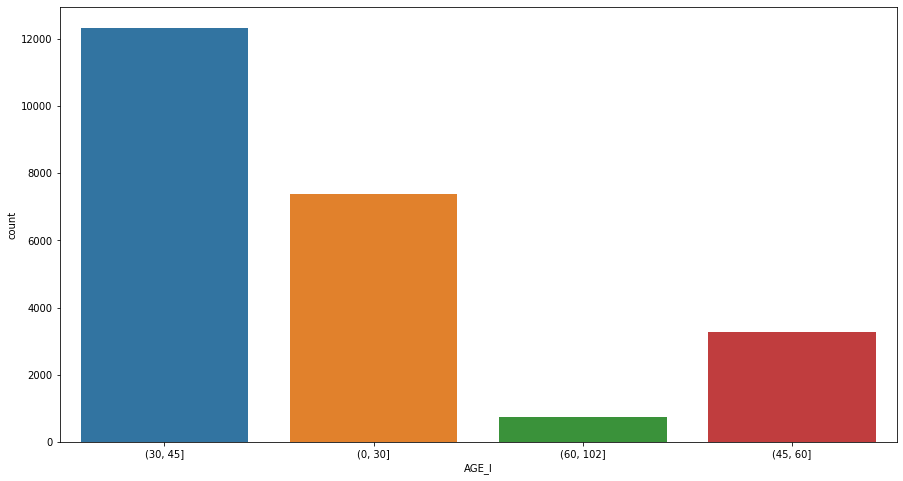

In [380]:
set(df['SUB_PRODUCT_CD'])
plt.figure(figsize=(15,8))
sns.countplot(data = df,x = 'AGE_I')

{'(0, 30]', '(30, 45]', '(45, 60]', '(60, 102]'}


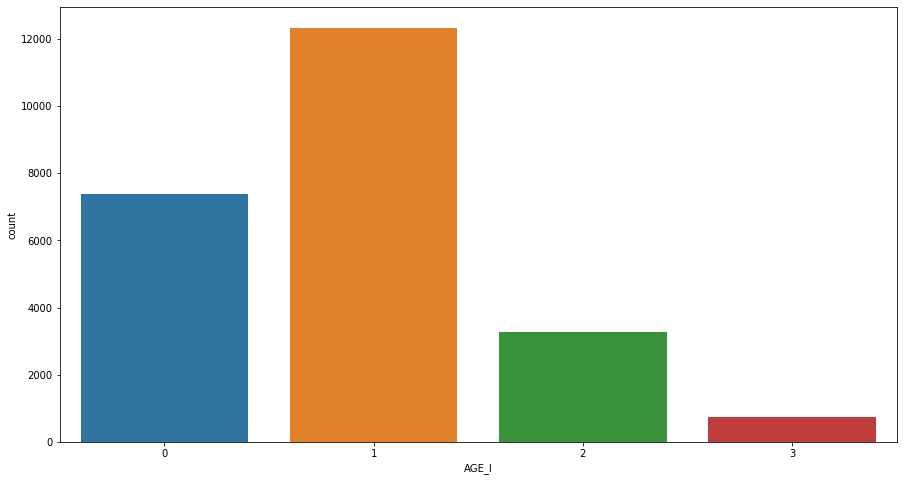

In [379]:
set(X['SUB_PRODUCT_CD'])
plt.figure(figsize=(15,8))

sns.countplot(data = X,x = 'AGE_I')
print(set(df['AGE_I'])
)

In [371]:
df.drop(columns = 'CUST_ID',inplace = True)

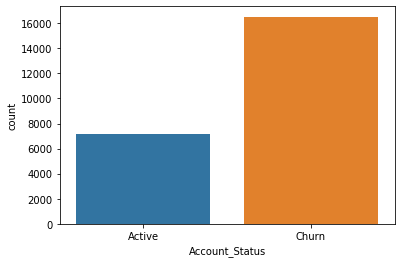

In [32]:
sns.countplot(x = 'Account_Status',data = df)

In [48]:
active = df[df['Account_Status'] == 'Active']['Account_Status'].count()

In [51]:
#percentage of active and churn
print("Active Percentage = ",active / df['Account_Status'].count() * 100)


Active Percentage =  30.329494156857784


In [52]:
df_M = df[df['GENDER'] == 'M']
df_F = df[df['GENDER'] == 'F']

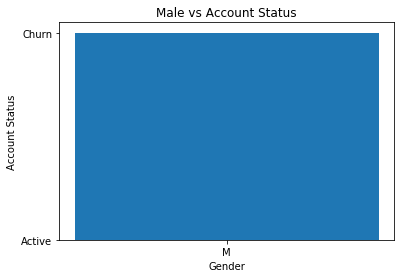

In [56]:
plt.bar(df_M['GENDER'],df_M['Account_Status'],width = 0.6)
plt.title("Male vs Account Status")
plt.xlabel("Gender")
plt.ylabel("Account Status")
plt.show()

Male vs Status


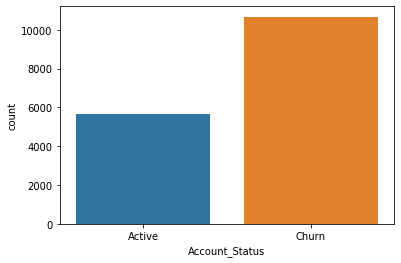

In [64]:
print("Male vs Status")
sns.countplot(data = df_M,x = 'Account_Status')

Female vs Status


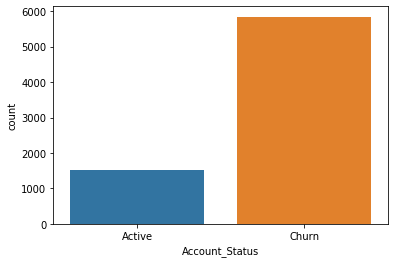

In [63]:
print("Female vs Status")
sns.countplot(data = df_F,x = 'Account_Status')

Male vs Source


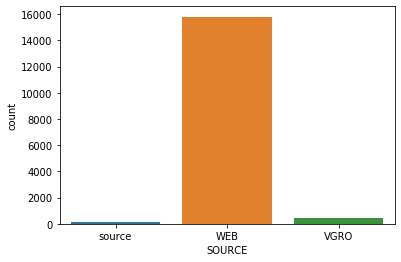

In [62]:
print("Male vs Source")
sns.countplot(data = df_M,x = 'SOURCE')

Female vs Source


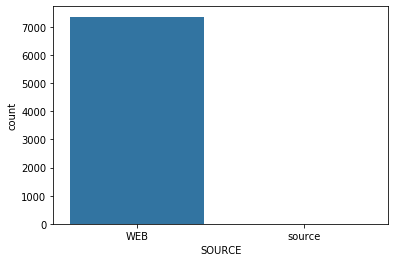

In [66]:
print("Female vs Source")
sns.countplot(data = df_F,x = 'SOURCE')

In [201]:
df.drop('CUST_ID',axis = 1,inplace = True)

In [202]:
df

,Account_Status,GENDER,SOURCE,LOCALE_VAL,STATE_VAL,CLIENT_CD_x,SUB_PRODUCT_CD,TRANS_METHOD,PMNT_TRNS_STATUS,AMOUNT,AGE,STATUS,AMOUNT_I,AGE_I
0,Active,M,source,en_US,Other,PA_CLNT_PVI,PAIN_NLIFE,PA_TRANS_BANK,PA_TRANS_STATUS_CP,4502.0,36,Active,"(-830.0, 207500.0]","(30, 45]"
1,Active,F,WEB,en_US,Other,PA_CLNT_PVI,PAIN_NLIFE,PA_TRANS_BANK,PA_TRANS_STATUS_CP,4502.0,33,Active,"(-830.0, 207500.0]","(30, 45]"
2,Active,M,WEB,en_US,Other,PA_CLNT_PVI,PAIN_NLIFE,PA_TRANS_BANK,PA_TRANS_STATUS_CP,4502.0,34,Active,"(-830.0, 207500.0]","(30, 45]"
3,Active,M,WEB,en_US,Other,PA_CLNT_PVI,PAIN_NLIFE,PA_TRANS_BANK,PA_TRANS_STATUS_CP,4502.0,1,Churn,"(-830.0, 207500.0]","(0, 30]"
4,Active,M,WEB,en_US,ST_VIET_50,PA_CLNT_PVI,PAIN_NLIFE,PA_TRANS_BANK,PA_TRANS_STATUS_CP,4502.0,36,Active,"(-830.0, 207500.0]","(30, 45]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23698,Churn,M,WEB,vi_VN,ST_VIET_50,PA_CLNT_PVI,PAIN_NLIFE,PA_TRANS_BANK,PA_TRANS_STATUS_CP,4502.0,36,Active,"(-830.0, 207500.0]","(30, 45]"
23699,Churn,M,WEB,vi_VN,ST_VIET_50,PA_CLNT_PVI,PAIN_LIFE,PA_TRANS_BANK,PA_TRANS_STATUS_CP,4502.0,36,Active,"(-830.0, 207500.0]","(30, 45]"
23700,Churn,M,WEB,vi_VN,ST_VIET_50,PA_CLNT_PVI,PAIN_LIFE,PA_TRANS_BANK,PA_TRANS_STATUS_CP,4502.0,36,Active,"(-830.0, 207500.0]","(30, 45]"
23701,Churn,M,WEB,vi_VN,ST_VIET_50,PA_CLNT_PVI,PAIN_LIFE,PA_TRANS_BANK,PA_TRANS_STATUS_CP,4502.0,36,Active,"(-830.0, 207500.0]","(30, 45]"


Male vs LOCAL


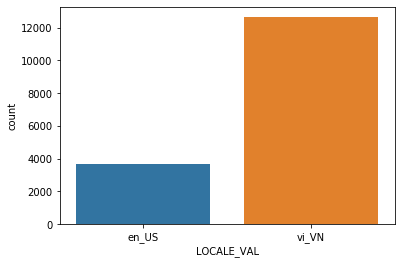

In [74]:
print("Male vs LOCAL")
sns.countplot(data = df_M,x = 'LOCALE_VAL')

Female vs LOCALE


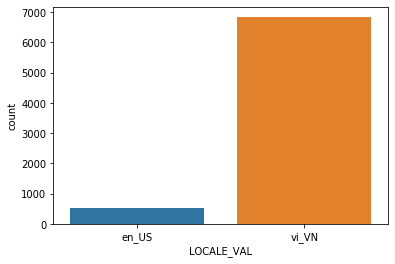

In [75]:
print("Female vs LOCALE")
sns.countplot(data = df_F,x = 'LOCALE_VAL')

Female vs STATE_VAL


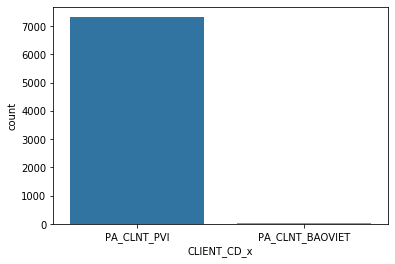

In [77]:
print("Female vs STATE_VAL")
sns.countplot(data = df_F,x = 'CLIENT_CD_x')

Male vs STATE_VAL


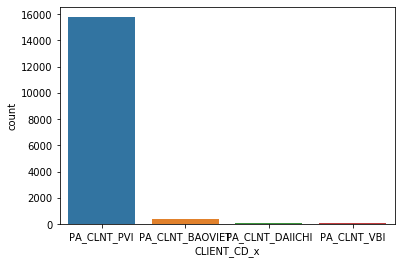

In [78]:
print("Male vs STATE_VAL")
sns.countplot(data = df_M,x = 'CLIENT_CD_x')

Female vs STATE_VAL


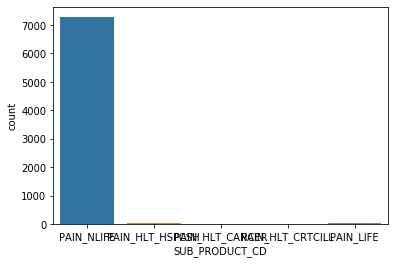

In [79]:
print("Female vs STATE_VAL")
sns.countplot(data = df_F,x = 'SUB_PRODUCT_CD')

male vs STATE_VAL


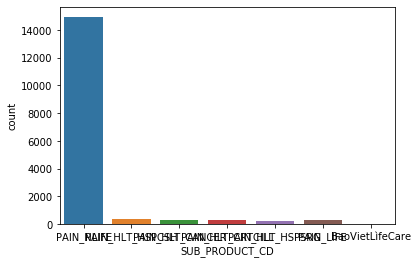

In [84]:
print("male vs STATE_VAL")
sns.countplot(data = df_M,x = 'SUB_PRODUCT_CD')

Female vs TRANS_METHOD


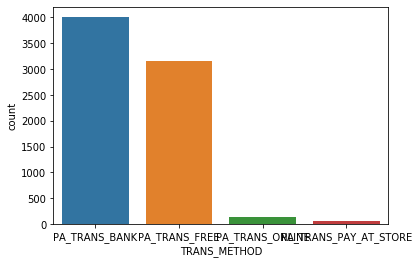

In [83]:
print("Female vs TRANS_METHOD")
sns.countplot(data = df_F,x = 'TRANS_METHOD')

Male vs TRANS_METHOD


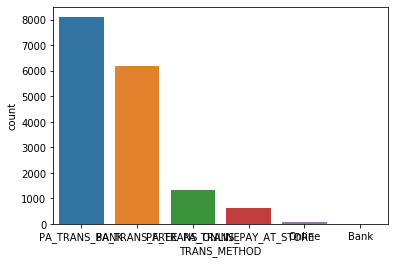

In [91]:
print("Male vs TRANS_METHOD")
sns.countplot(data = df_M,x = 'TRANS_METHOD')

Male vs PMNT_TRANS_STATUS


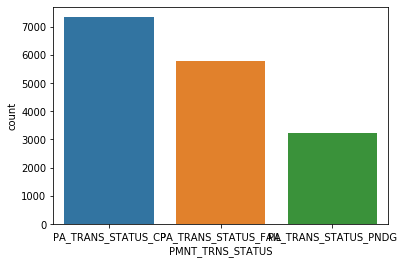

In [92]:
print("Male vs PMNT_TRANS_STATUS")
sns.countplot(data = df_M,x = 'PMNT_TRNS_STATUS')

female vs PMNT_TRANS_STATUS


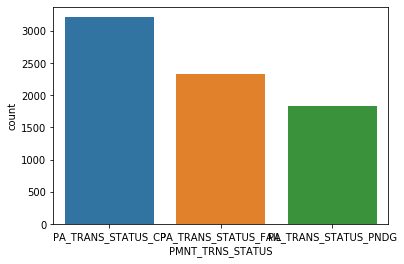

In [93]:
print("female vs PMNT_TRANS_STATUS")
sns.countplot(data = df_F,x = 'PMNT_TRNS_STATUS')

female vs AGE


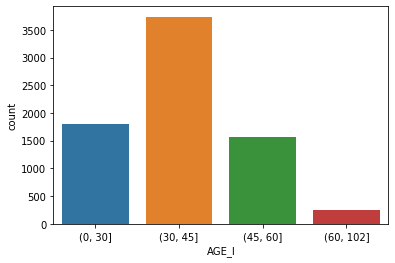

In [100]:
print("female vs AGE")
sns.countplot(data = df_F.sort_values(by = 'AGE_I'),x = 'AGE_I')

male vs AGE


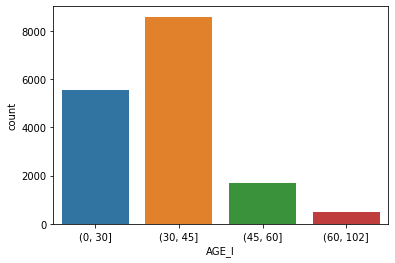

In [99]:
print("male vs AGE")
sns.countplot(data = df_M.sort_values(by = 'AGE_I'),x = 'AGE_I')

male vs AMOUNT


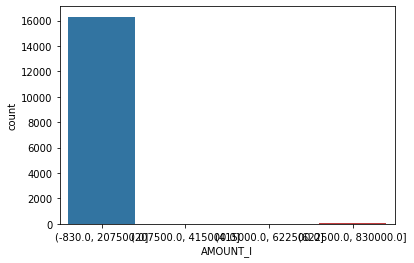

In [103]:
print("male vs AMOUNT")
sns.countplot(data = df_M.sort_values(by = 'AMOUNT_I'),x = 'AMOUNT_I')

female vs AMOUNT


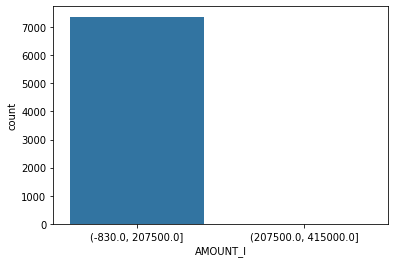

In [104]:
print("female vs AMOUNT")
sns.countplot(data = df_F.sort_values(by = 'AMOUNT_I'),x = 'AMOUNT_I')

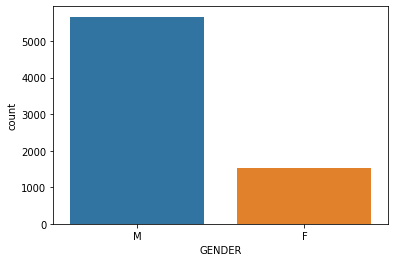

In [115]:
df_A = df[df['Account_Status'] == 'Active']
df_A_M = df_A[df_A['GENDER'] == 'M']
sns.countplot(data = df_A,x = 'GENDER')

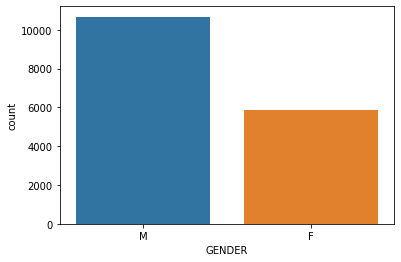

In [116]:
df_C = df[df['Account_Status'] == 'Churn']

sns.countplot(data = df_C,x = 'GENDER')

Active vs SOURCE


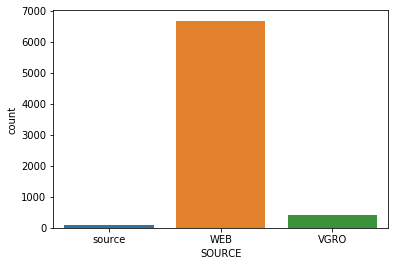

In [117]:
print("Active vs SOURCE")
sns.countplot(data = df_A,x = 'SOURCE')

churn vs SOURCE


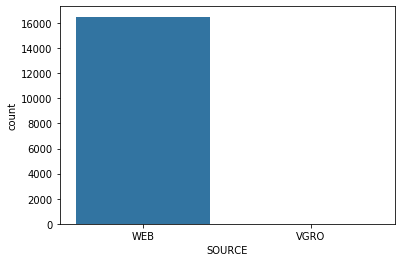

In [118]:
print("churn vs SOURCE")
sns.countplot(data = df_C,x = 'SOURCE')

active vs CLIENT_CD_x


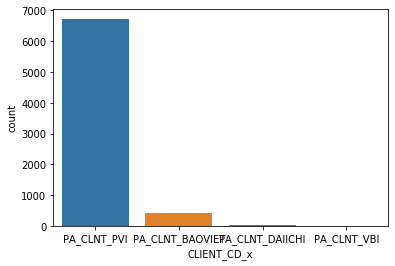

In [121]:
print("active vs CLIENT_CD_x")
sns.countplot(data = df_A,x = 'CLIENT_CD_x')

churn vs CLIENT_CD_x


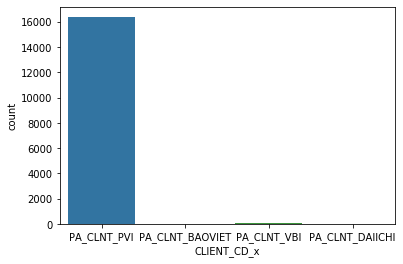

In [122]:
print("churn vs CLIENT_CD_x")
sns.countplot(data = df_C,x = 'CLIENT_CD_x')

Active vs AGE


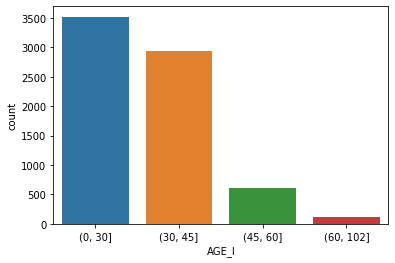

In [126]:
print("Active vs AGE")
sns.countplot(data = df_A.sort_values(by = 'AGE_I'),x = 'AGE_I')

churn vs AGE


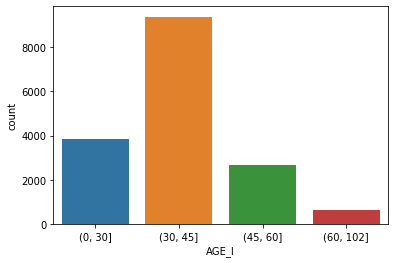

In [127]:
print("churn vs AGE")
sns.countplot(data = df_C.sort_values(by = 'AGE_I'),x = 'AGE_I')

Active vs AMOUNT


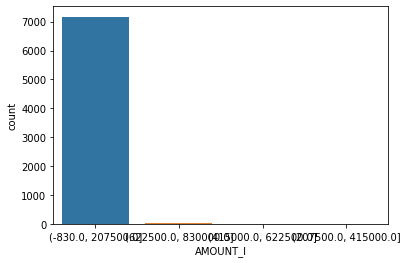

In [128]:
print("Active vs AMOUNT")
sns.countplot(data = df_A,x = 'AMOUNT_I')

churn vs AMOUNT


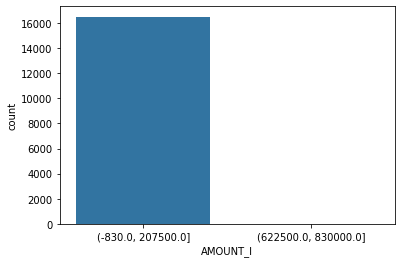

In [129]:
print("churn vs AMOUNT")
sns.countplot(data = df_C,x = 'AMOUNT_I')

In [203]:
df_E = df.copy()
df_E_C = df_E.drop(columns = ['AGE','AMOUNT'])

In [204]:
for col in df_E_C.columns:
    df_E_C[col] = labelencoder.fit_transform(df_E_C[col])


In [412]:
df_E_C.drop(columns = ['STATUS'],inplace = True)

In [413]:
df_E_C.to_excel("Data after encoding.xlsx")

In [206]:
li = list(df_E_C.columns)
li.remove('Account_Status')
li

['GENDER',
 'SOURCE',
 'LOCALE_VAL',
 'STATE_VAL',
 'CLIENT_CD_x',
 'SUB_PRODUCT_CD',
 'TRANS_METHOD',
 'PMNT_TRNS_STATUS',
 'STATUS',
 'AMOUNT_I',
 'AGE_I']

In [207]:
X = df_E_C[li]
y = df_E_C['Account_Status']

In [208]:
from sklearn.model_selection import train_test_split
X_Train,X_rem,Y_Train,Y_rem = train_test_split(X,y,test_size = 0.4,random_state = 42,shuffle = True)
X_rem.shape
X_Test,X_Validate,Y_Test,Y_Validate = train_test_split(X_rem,Y_rem,test_size =0.25 )

In [238]:
X

,GENDER,SOURCE,LOCALE_VAL,STATE_VAL,CLIENT_CD_x,SUB_PRODUCT_CD,TRANS_METHOD,PMNT_TRNS_STATUS,STATUS,AMOUNT_I,AGE_I
0,1,2,0,0,2,6,2,0,0,0,1
1,0,1,0,0,2,6,2,0,0,0,1
2,1,1,0,0,2,6,2,0,0,0,1
3,1,1,0,0,2,6,2,0,1,0,0
4,1,1,0,46,2,6,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
23698,1,1,1,46,2,6,2,0,0,0,1
23699,1,1,1,46,2,5,2,0,0,0,1
23700,1,1,1,46,2,5,2,0,0,0,1
23701,1,1,1,46,2,5,2,0,0,0,1


In [209]:

df = pd.concat([Y_Train,X_Train],axis = 1)
df['Account_Status'].value_counts()

1    9911
0    4310
Name: Account_Status, dtype: int64

In [210]:
count_class = 4310
df_class_0 = df[df['Account_Status'] == 0]
df_class_1 = df[df['Account_Status'] == 1]
df_class_0_over = df_class_0.sample(count_class * 7,replace = True)

In [211]:
df_class_0_over

,Account_Status,GENDER,SOURCE,LOCALE_VAL,STATE_VAL,CLIENT_CD_x,SUB_PRODUCT_CD,TRANS_METHOD,PMNT_TRNS_STATUS,STATUS,AMOUNT_I,AGE_I
419,0,1,0,1,46,2,6,4,1,0,0,0
9933,0,1,1,1,31,2,6,3,0,0,0,0
2263,0,1,1,0,46,2,6,2,1,0,0,0
11801,0,1,1,1,40,2,6,3,0,0,0,1
6752,0,1,1,1,46,2,6,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9918,0,1,1,1,22,2,6,2,1,0,0,1
6112,0,1,1,0,15,2,6,3,0,0,0,0
2599,0,1,1,0,46,2,6,3,0,0,0,0
2063,0,1,1,0,0,2,6,4,1,1,0,0


In [224]:
X_Train = pd.concat([df_class_0_over,df_class_1])

In [225]:
X_Train

,Account_Status,GENDER,SOURCE,LOCALE_VAL,STATE_VAL,CLIENT_CD_x,SUB_PRODUCT_CD,TRANS_METHOD,PMNT_TRNS_STATUS,STATUS,AMOUNT_I,AGE_I
419,0,1,0,1,46,2,6,4,1,0,0,0
9933,0,1,1,1,31,2,6,3,0,0,0,0
2263,0,1,1,0,46,2,6,2,1,0,0,0
11801,0,1,1,1,40,2,6,3,0,0,0,1
6752,0,1,1,1,46,2,6,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
22118,1,0,1,1,47,2,6,3,0,0,0,1
11284,1,1,1,1,25,2,6,2,2,1,0,2
21575,1,0,1,1,19,2,6,3,0,0,0,1
15795,1,0,1,1,46,2,6,3,0,0,0,1


In [226]:
Y_Train = X_Train['Account_Status']

In [227]:
X_Train.drop(columns = ['Account_Status'],inplace = True )

In [219]:
Y_Train = df_class_0_over['Account_Status'] + df_class_1['Account_Status']

In [223]:
df_class_0_over['Account_Status']

419      0
9933     0
2263     0
11801    0
6752     0
        ..
9918     0
6112     0
2599     0
2063     0
6059     0
Name: Account_Status, Length: 30170, dtype: int32

In [228]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
sel = RandomForestClassifier(n_estimators = 50)
sel.fit(X_Train, Y_Train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [230]:
imp = sel.feature_importances_

# Decision Tree Classifier

In [311]:
from sklearn.tree import DecisionTreeClassifier

In [316]:
dclf = DecisionTreeClassifier()
dclf.fit(X_Train,Y_Train)
pred = dclf.predict(X_Test)
print(accuracy_score(Y_Test,pred))
print(confusion_matrix(Y_Test, pred))
print(classification_report(Y_Test, pred))

0.5564618197159331
[[1888  245]
 [2909 2069]]
              precision    recall  f1-score   support

           0       0.39      0.89      0.54      2133
           1       0.89      0.42      0.57      4978

    accuracy                           0.56      7111
   macro avg       0.64      0.65      0.56      7111
weighted avg       0.74      0.56      0.56      7111



In [317]:
dclf = DecisionTreeClassifier()
dclf.fit(X_Train_8,Y_Train)
pred = dclf.predict(X_Test_8)
print(accuracy_score(Y_Test,pred))
print(confusion_matrix(Y_Test, pred))
print(classification_report(Y_Test, pred))

0.5488679510617354
[[1909  224]
 [2984 1994]]
              precision    recall  f1-score   support

           0       0.39      0.89      0.54      2133
           1       0.90      0.40      0.55      4978

    accuracy                           0.55      7111
   macro avg       0.64      0.65      0.55      7111
weighted avg       0.75      0.55      0.55      7111



In [318]:
dclf = DecisionTreeClassifier()
dclf.fit(X_Train_7,Y_Train)
pred = dclf.predict(X_Test_7)
print(accuracy_score(Y_Test,pred))
print(confusion_matrix(Y_Test, pred))
print(classification_report(Y_Test, pred))

0.5490085782590353
[[1909  224]
 [2983 1995]]
              precision    recall  f1-score   support

           0       0.39      0.89      0.54      2133
           1       0.90      0.40      0.55      4978

    accuracy                           0.55      7111
   macro avg       0.64      0.65      0.55      7111
weighted avg       0.75      0.55      0.55      7111



In [319]:
dclf = DecisionTreeClassifier()
dclf.fit(X_Train_6,Y_Train)
pred = dclf.predict(X_Test_6)
print(accuracy_score(Y_Test,pred))
print(confusion_matrix(Y_Test, pred))
print(classification_report(Y_Test, pred))

0.5457741527211363
[[1909  224]
 [3006 1972]]
              precision    recall  f1-score   support

           0       0.39      0.89      0.54      2133
           1       0.90      0.40      0.55      4978

    accuracy                           0.55      7111
   macro avg       0.64      0.65      0.55      7111
weighted avg       0.75      0.55      0.55      7111



In [320]:
dclf = DecisionTreeClassifier()
dclf.fit(X_Train_5,Y_Train)
pred = dclf.predict(X_Test_5)
print(accuracy_score(Y_Test,pred))
print(confusion_matrix(Y_Test, pred))
print(classification_report(Y_Test, pred))

0.5241175643369428
[[1926  207]
 [3177 1801]]
              precision    recall  f1-score   support

           0       0.38      0.90      0.53      2133
           1       0.90      0.36      0.52      4978

    accuracy                           0.52      7111
   macro avg       0.64      0.63      0.52      7111
weighted avg       0.74      0.52      0.52      7111



# Support Vector Machines

In [326]:
from sklearn import svm
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_Train,Y_Train)
pred = clf.predict(X_Test)
print(accuracy_score(Y_Test,pred))
print(confusion_matrix(Y_Test, pred))
print(classification_report(Y_Test, pred))

0.3355364927576993
[[1554  579]
 [4146  832]]
              precision    recall  f1-score   support

           0       0.27      0.73      0.40      2133
           1       0.59      0.17      0.26      4978

    accuracy                           0.34      7111
   macro avg       0.43      0.45      0.33      7111
weighted avg       0.49      0.34      0.30      7111



In [329]:
from sklearn import svm
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_Train_8,Y_Train)
pred = clf.predict(X_Test_8)
print(accuracy_score(Y_Test,pred))
print(confusion_matrix(Y_Test, pred))
print(classification_report(Y_Test, pred))

0.32259879060610325
[[1570  563]
 [4254  724]]
              precision    recall  f1-score   support

           0       0.27      0.74      0.39      2133
           1       0.56      0.15      0.23      4978

    accuracy                           0.32      7111
   macro avg       0.42      0.44      0.31      7111
weighted avg       0.47      0.32      0.28      7111



In [331]:
from sklearn import svm
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_Train_7,Y_Train)
pred = clf.predict(X_Test_7)
print(accuracy_score(Y_Test,pred))
print(confusion_matrix(Y_Test, pred))
print(classification_report(Y_Test, pred))

0.323301926592603
[[1570  563]
 [4249  729]]
              precision    recall  f1-score   support

           0       0.27      0.74      0.39      2133
           1       0.56      0.15      0.23      4978

    accuracy                           0.32      7111
   macro avg       0.42      0.44      0.31      7111
weighted avg       0.48      0.32      0.28      7111



In [332]:
from sklearn import svm
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_Train_6,Y_Train)
pred = clf.predict(X_Test_6)
print(accuracy_score(Y_Test,pred))
print(confusion_matrix(Y_Test, pred))
print(classification_report(Y_Test, pred))

0.323301926592603
[[1570  563]
 [4249  729]]
              precision    recall  f1-score   support

           0       0.27      0.74      0.39      2133
           1       0.56      0.15      0.23      4978

    accuracy                           0.32      7111
   macro avg       0.42      0.44      0.31      7111
weighted avg       0.48      0.32      0.28      7111



In [330]:
from sklearn import svm
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_Train_5,Y_Train)
pred = clf.predict(X_Test_5)
print(accuracy_score(Y_Test,pred))
print(confusion_matrix(Y_Test, pred))
print(classification_report(Y_Test, pred))

0.3220362818169034
[[1574  559]
 [4262  716]]
              precision    recall  f1-score   support

           0       0.27      0.74      0.40      2133
           1       0.56      0.14      0.23      4978

    accuracy                           0.32      7111
   macro avg       0.42      0.44      0.31      7111
weighted avg       0.47      0.32      0.28      7111



In [333]:
from sklearn import svm
clf = svm.SVC(kernel='poly')
clf.fit(X_Train,Y_Train)
pred = clf.predict(X_Test)
print(accuracy_score(Y_Test,pred))
print(confusion_matrix(Y_Test, pred))
print(classification_report(Y_Test, pred))

0.29995781184081
[[2133    0]
 [4978    0]]
              precision    recall  f1-score   support

           0       0.30      1.00      0.46      2133
           1       0.00      0.00      0.00      4978

    accuracy                           0.30      7111
   macro avg       0.15      0.50      0.23      7111
weighted avg       0.09      0.30      0.14      7111



C:\Users\bavik\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [334]:
from sklearn import svm
clf = svm.SVC(kernel='poly')
clf.fit(X_Train_5,Y_Train)
pred = clf.predict(X_Test_5)
print(accuracy_score(Y_Test,pred))
print(confusion_matrix(Y_Test, pred))
print(classification_report(Y_Test, pred))

0.29995781184081
[[2133    0]
 [4978    0]]
              precision    recall  f1-score   support

           0       0.30      1.00      0.46      2133
           1       0.00      0.00      0.00      4978

    accuracy                           0.30      7111
   macro avg       0.15      0.50      0.23      7111
weighted avg       0.09      0.30      0.14      7111



C:\Users\bavik\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression

In [335]:
from sklearn.linear_model import LogisticRegression
Lclf = LogisticRegression()
Lclf.fit(X_Train,Y_Train)
pred = Lclf.predict(X_Test)
print(accuracy_score(Y_Test,pred))
print(confusion_matrix(Y_Test, pred))
print(classification_report(Y_Test, pred))

0.40275629306707916
[[2003  130]
 [4117  861]]
              precision    recall  f1-score   support

           0       0.33      0.94      0.49      2133
           1       0.87      0.17      0.29      4978

    accuracy                           0.40      7111
   macro avg       0.60      0.56      0.39      7111
weighted avg       0.71      0.40      0.35      7111



C:\Users\bavik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [336]:
from sklearn.linear_model import LogisticRegression
Lclf = LogisticRegression()
Lclf.fit(X_Train_8,Y_Train)
pred = Lclf.predict(X_Test_8)
print(accuracy_score(Y_Test,pred))
print(confusion_matrix(Y_Test, pred))
print(classification_report(Y_Test, pred))

0.39656869638588105
[[1999  134]
 [4157  821]]
              precision    recall  f1-score   support

           0       0.32      0.94      0.48      2133
           1       0.86      0.16      0.28      4978

    accuracy                           0.40      7111
   macro avg       0.59      0.55      0.38      7111
weighted avg       0.70      0.40      0.34      7111



C:\Users\bavik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [337]:
from sklearn.linear_model import LogisticRegression
Lclf = LogisticRegression()
Lclf.fit(X_Train_7,Y_Train)
pred = Lclf.predict(X_Test_7)
print(accuracy_score(Y_Test,pred))
print(confusion_matrix(Y_Test, pred))
print(classification_report(Y_Test, pred))

0.3782871607368865
[[2032  101]
 [4320  658]]
              precision    recall  f1-score   support

           0       0.32      0.95      0.48      2133
           1       0.87      0.13      0.23      4978

    accuracy                           0.38      7111
   macro avg       0.59      0.54      0.35      7111
weighted avg       0.70      0.38      0.30      7111



C:\Users\bavik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [338]:
from sklearn.linear_model import LogisticRegression
Lclf = LogisticRegression()
Lclf.fit(X_Train_6,Y_Train)
pred = Lclf.predict(X_Test_6)
print(accuracy_score(Y_Test,pred))
print(confusion_matrix(Y_Test, pred))
print(classification_report(Y_Test, pred))

0.3782871607368865
[[2032  101]
 [4320  658]]
              precision    recall  f1-score   support

           0       0.32      0.95      0.48      2133
           1       0.87      0.13      0.23      4978

    accuracy                           0.38      7111
   macro avg       0.59      0.54      0.35      7111
weighted avg       0.70      0.38      0.30      7111



In [339]:
from sklearn.linear_model import LogisticRegression
Lclf = LogisticRegression()
Lclf.fit(X_Train_5,Y_Train)
pred = Lclf.predict(X_Test_5)
print(accuracy_score(Y_Test,pred))
print(confusion_matrix(Y_Test, pred))
print(classification_report(Y_Test, pred))

0.3577555899310927
[[2058   75]
 [4492  486]]
              precision    recall  f1-score   support

           0       0.31      0.96      0.47      2133
           1       0.87      0.10      0.18      4978

    accuracy                           0.36      7111
   macro avg       0.59      0.53      0.32      7111
weighted avg       0.70      0.36      0.27      7111



# Days to Churn Prediction

In [2]:
df = pd.read_excel("Data_Before_Encoding-DTC.xlsx")
df.drop(columns = 'Unnamed: 0',inplace = True)
df = df[df['DaysToChurn'] >= 0]

In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [11]:
df_E = df.copy()

In [13]:
for i in df_E.columns:
    if(i != 'DaysToChurn'):
        df_E[i] = labelencoder.fit_transform(df_E[i])

In [14]:
df_E

,Account_Status,DaysToChurn,GENDER,SOURCE,LOCALE_VAL,STATE_VAL,CLIENT_CD_x,SUB_PRODUCT_CD,TRANS_METHOD,PMNT_TRNS_STATUS,AMOUNT,AMOUNT_I,AGE_I
17,0,4627.0,1,1,0,46,2,6,2,0,0,0,1
18,0,10645.0,1,1,1,46,2,6,2,0,0,0,1
19,0,9978.0,1,1,0,46,2,6,2,1,0,0,0
20,0,19236.0,1,1,0,46,2,6,2,0,0,0,0
21,0,10481.0,1,1,0,46,2,6,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23698,0,3172.0,1,1,1,46,2,6,2,0,0,0,1
23699,0,541.0,1,1,1,46,2,5,2,0,0,0,1
23700,0,3373.0,1,1,1,46,2,5,2,0,0,0,1
23701,0,1082.0,1,1,1,46,2,5,2,0,0,0,1


In [182]:
X = df_E.copy()
X.drop(columns = 'Account_Status',inplace = True)
y = df_E['DaysToChurn']

In [181]:
X.drop('DaysToChurn',axis = 1,inplace = True)

In [183]:
X

,DaysToChurn,GENDER,SOURCE,LOCALE_VAL,STATE_VAL,CLIENT_CD_x,SUB_PRODUCT_CD,TRANS_METHOD,PMNT_TRNS_STATUS,AMOUNT,AMOUNT_I,AGE_I,Days_I
17,4627.0,1,1,0,46,2,6,2,0,0,0,1,1
18,10645.0,1,1,1,46,2,6,2,0,0,0,1,3
19,9978.0,1,1,0,46,2,6,2,1,0,0,0,2
20,19236.0,1,1,0,46,2,6,2,0,0,0,0,5
21,10481.0,1,1,0,46,2,6,3,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23698,3172.0,1,1,1,46,2,6,2,0,0,0,1,0
23699,541.0,1,1,1,46,2,5,2,0,0,0,1,0
23700,3373.0,1,1,1,46,2,5,2,0,0,0,1,1
23701,1082.0,1,1,1,46,2,5,2,0,0,0,1,0


In [51]:
X.drop(columns = 'AMOUNT',inplace = True)

In [52]:
y = y.astype('Int64')

In [53]:
bin_Days = pd.cut(y,bins = 6)

In [54]:
y = bin_Days

In [55]:
y

17         (3358.167, 6686.333]
18         (10014.5, 13342.667]
19          (6686.333, 10014.5]
20         (16670.833, 19999.0]
21         (10014.5, 13342.667]
                  ...          
23698        (10.031, 3358.167]
23699        (10.031, 3358.167]
23700      (3358.167, 6686.333]
23701        (10.031, 3358.167]
23702    (13342.667, 16670.833]
Name: DaysToChurn, Length: 16514, dtype: category
Categories (6, interval[float64]): [(10.031, 3358.167] < (3358.167, 6686.333] < (6686.333, 10014.5] < (10014.5, 13342.667] < (13342.667, 16670.833] < (16670.833, 19999.0]]

In [56]:
y_E = labelencoder.fit_transform(y)

In [70]:
set(df['AMOUNT_I'])

{'(-830.0, 207500.0]', '(622500.0, 830000.0]'}

In [84]:
from sklearn.model_selection import train_test_split
X_Train,X_rem,Y_Train,Y_rem = train_test_split(X,y_E,test_size = 0.4,random_state = 42,shuffle = True)
X_rem.shape
X_Test,X_Validate,Y_Test,Y_Validate = train_test_split(X_rem,Y_rem,test_size =0.25 )

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [114]:
X

,GENDER,SOURCE,LOCALE_VAL,STATE_VAL,CLIENT_CD_x,SUB_PRODUCT_CD,TRANS_METHOD,PMNT_TRNS_STATUS,AMOUNT_I,AGE_I
17,1,1,0,46,2,6,2,0,0,1
18,1,1,1,46,2,6,2,0,0,1
19,1,1,0,46,2,6,2,1,0,0
20,1,1,0,46,2,6,2,0,0,0
21,1,1,0,46,2,6,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...
23698,1,1,1,46,2,6,2,0,0,1
23699,1,1,1,46,2,5,2,0,0,1
23700,1,1,1,46,2,5,2,0,0,1
23701,1,1,1,46,2,5,2,0,0,1


In [115]:

dclf = DecisionTreeClassifier()
dclf.fit(X_Train,Y_Train)
pred = dclf.predict(X_Test)
print(accuracy_score(Y_Test,pred))
print(confusion_matrix(Y_Test, pred))
print(classification_report(Y_Test, pred))

0.17359709325797335
[[210 180 113 144  80  92]
 [202 178 147 128  75  93]
 [173 190 134 148  79  91]
 [198 177 120 160  66 113]
 [186 180 126 152  73 106]
 [202 190 141 138  64 105]]
              precision    recall  f1-score   support

           0       0.18      0.26      0.21       819
           1       0.16      0.22      0.19       823
           2       0.17      0.16      0.17       815
           3       0.18      0.19      0.19       834
           4       0.17      0.09      0.12       823
           5       0.17      0.12      0.15       840

    accuracy                           0.17      4954
   macro avg       0.17      0.17      0.17      4954
weighted avg       0.17      0.17      0.17      4954



In [ ]:
imp = 

In [116]:
import pickle
filename = "ChurnDays.pkl"
outfile = open(filename,'wb')
pickle.dump(dclf,outfile)
outfile.close()

In [88]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_Train,Y_Train)
pred = clf.predict(X_Test)
print(accuracy_score(Y_Test,pred))
print(confusion_matrix(Y_Test, pred))
print(classification_report(Y_Test, pred))

0.16774323778764635
[[354 163   0 131   0 171]
 [358 163   0 130   0 172]
 [373 155   0 118   0 169]
 [369 151   0 133   0 181]
 [376 152   0 108   0 187]
 [392 161   0 106   0 181]]
              precision    recall  f1-score   support

           0       0.16      0.43      0.23       819
           1       0.17      0.20      0.18       823
           2       0.00      0.00      0.00       815
           3       0.18      0.16      0.17       834
           4       0.00      0.00      0.00       823
           5       0.17      0.22      0.19       840

    accuracy                           0.17      4954
   macro avg       0.11      0.17      0.13      4954
weighted avg       0.11      0.17      0.13      4954



C:\Users\bavik\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
X

,DaysToChurn,GENDER,SOURCE,LOCALE_VAL,STATE_VAL,CLIENT_CD_x,SUB_PRODUCT_CD,TRANS_METHOD,PMNT_TRNS_STATUS,AMOUNT_I,AGE_I
17,4627.0,1,1,0,46,2,6,2,0,0,1
18,10645.0,1,1,1,46,2,6,2,0,0,1
19,9978.0,1,1,0,46,2,6,2,1,0,0
20,19236.0,1,1,0,46,2,6,2,0,0,0
21,10481.0,1,1,0,46,2,6,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
23698,3172.0,1,1,1,46,2,6,2,0,0,1
23699,541.0,1,1,1,46,2,5,2,0,0,1
23700,3373.0,1,1,1,46,2,5,2,0,0,1
23701,1082.0,1,1,1,46,2,5,2,0,0,1


In [89]:
importance = dclf.feature_importances_

In [97]:
colu = X.columns

In [110]:
dic = {}
for i in range(len(colu)):
    dic[importance[i]] = colu[i]
col = []
for i in sorted(dic.keys())[::-1]:
    col.append(dic[i])

In [111]:
top8 = col[:8]
X_Train_8 = X_Train[list(top8)]
X_Test_8 = X_Test[list(top8)]
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
sel = RandomForestClassifier(n_estimators = 50)
sel.fit(X_Train_8, Y_Train)
y_pred = sel.predict(X_Test_8)
print(accuracy_score(Y_Test,y_pred))
print(confusion_matrix(Y_Test, y_pred))
print(classification_report(Y_Test, y_pred))

0.16996366572466692
[[147 155 116 157 111 133]
 [152 157 145 154  94 121]
 [128 156 133 160 109 129]
 [148 147 111 165 103 160]
 [138 151 126 168 100 140]
 [139 156 133 163 109 140]]
              precision    recall  f1-score   support

           0       0.17      0.18      0.18       819
           1       0.17      0.19      0.18       823
           2       0.17      0.16      0.17       815
           3       0.17      0.20      0.18       834
           4       0.16      0.12      0.14       823
           5       0.17      0.17      0.17       840

    accuracy                           0.17      4954
   macro avg       0.17      0.17      0.17      4954
weighted avg       0.17      0.17      0.17      4954



In [112]:
top8 = col[:7]
X_Train_8 = X_Train[list(top8)]
X_Test_8 = X_Test[list(top8)]
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
sel = RandomForestClassifier(n_estimators = 50)
sel.fit(X_Train_8, Y_Train)
y_pred = sel.predict(X_Test_8)
print(accuracy_score(Y_Test,y_pred))
print(confusion_matrix(Y_Test, y_pred))
print(classification_report(Y_Test, y_pred))

0.16955995155429957
[[139 164 129 150 102 135]
 [158 167 139 143  91 125]
 [132 166 139 160  93 125]
 [145 166 107 165  94 157]
 [134 157 124 171  86 151]
 [140 159 151 157  89 144]]
              precision    recall  f1-score   support

           0       0.16      0.17      0.17       819
           1       0.17      0.20      0.19       823
           2       0.18      0.17      0.17       815
           3       0.17      0.20      0.19       834
           4       0.15      0.10      0.12       823
           5       0.17      0.17      0.17       840

    accuracy                           0.17      4954
   macro avg       0.17      0.17      0.17      4954
weighted avg       0.17      0.17      0.17      4954



In [113]:
top8 = col[:6]
X_Train_8 = X_Train[list(top8)]
X_Test_8 = X_Test[list(top8)]
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
sel = RandomForestClassifier(n_estimators = 50)
sel.fit(X_Train_8, Y_Train)
y_pred = sel.predict(X_Test_8)
print(accuracy_score(Y_Test,y_pred))
print(confusion_matrix(Y_Test, y_pred))
print(classification_report(Y_Test, y_pred))

0.1725878078320549
[[156 150 111 159 108 135]
 [155 149 125 158 106 130]
 [139 156 124 162  98 136]
 [146 122 107 175 111 173]
 [146 147 110 171 103 146]
 [146 139 146 157 104 148]]
              precision    recall  f1-score   support

           0       0.18      0.19      0.18       819
           1       0.17      0.18      0.18       823
           2       0.17      0.15      0.16       815
           3       0.18      0.21      0.19       834
           4       0.16      0.13      0.14       823
           5       0.17      0.18      0.17       840

    accuracy                           0.17      4954
   macro avg       0.17      0.17      0.17      4954
weighted avg       0.17      0.17      0.17      4954



In [109]:
top8 = col[:5]
X_Train_8 = X_Train[list(top8)]
X_Test_8 = X_Test[list(top8)]
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
sel = RandomForestClassifier(n_estimators = 50)
sel.fit(X_Train_8, Y_Train)
y_pred = sel.predict(X_Test_8)
print(accuracy_score(Y_Test,y_pred))
print(confusion_matrix(Y_Test, y_pred))
print(classification_report(Y_Test, y_pred))

0.1685506661283811
[[  1   3   0 757   3  55]
 [  2   4   0 743  11  63]
 [  2   2   0 753   8  50]
 [  1   3   0 766   9  55]
 [  3   6   0 755   3  56]
 [  1   3   0 772   3  61]]
              precision    recall  f1-score   support

           0       0.10      0.00      0.00       819
           1       0.19      0.00      0.01       823
           2       0.00      0.00      0.00       815
           3       0.17      0.92      0.28       834
           4       0.08      0.00      0.01       823
           5       0.18      0.07      0.10       840

    accuracy                           0.17      4954
   macro avg       0.12      0.17      0.07      4954
weighted avg       0.12      0.17      0.07      4954



C:\Users\bavik\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [119]:
y

17         (3358.167, 6686.333]
18         (10014.5, 13342.667]
19          (6686.333, 10014.5]
20         (16670.833, 19999.0]
21         (10014.5, 13342.667]
                  ...          
23698        (10.031, 3358.167]
23699        (10.031, 3358.167]
23700      (3358.167, 6686.333]
23701        (10.031, 3358.167]
23702    (13342.667, 16670.833]
Name: DaysToChurn, Length: 16514, dtype: category
Categories (6, interval[float64]): [(10.031, 3358.167] < (3358.167, 6686.333] < (6686.333, 10014.5] < (10014.5, 13342.667] < (13342.667, 16670.833] < (16670.833, 19999.0]]

In [147]:
import seaborn as sns
df_E['Days_I'] = y_E

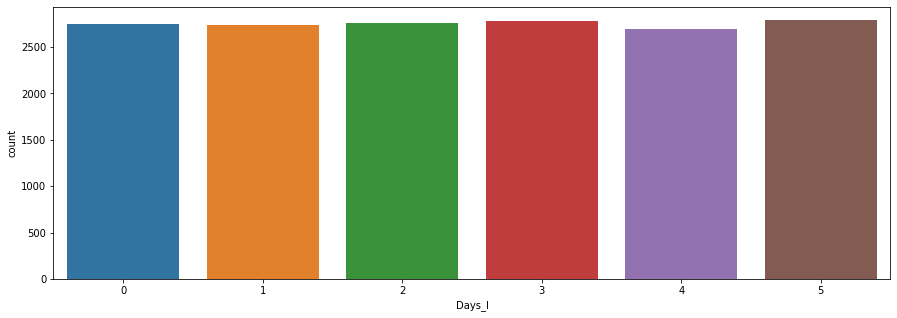

In [148]:
plt.figure(figsize = (15,5))
sns.countplot(data = df_E,x = 'Days_I')

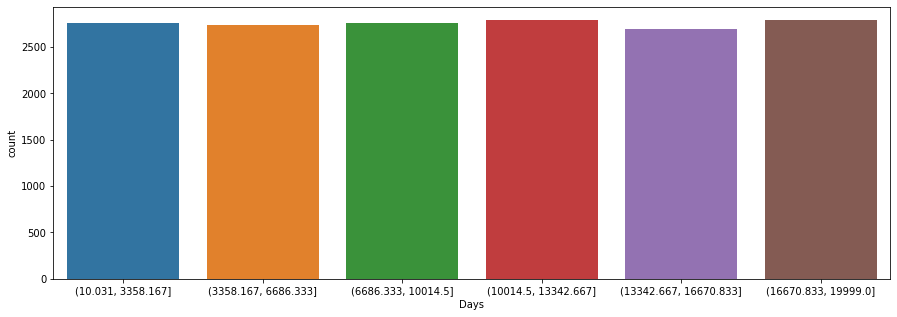

In [145]:
plt.figure(figsize = (15,5))
sns.countplot(data = df,x = 'Days')

# Clustering

(-15, 15)

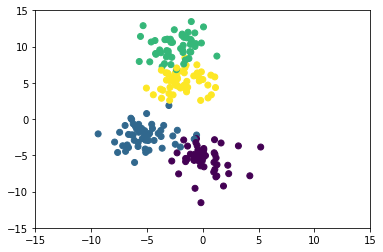

In [159]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
# create blobs
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)
# create np array for data points
points = X
# create scatter plot
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)

In [215]:
X.drop(columns = ['DaysToChurn','Days_I','AMOUNT'],inplace = True)

In [216]:
from sklearn.cluster import KMeans

kmeans = KMeans(5)
kmeans.fit(X)
kmeans.cluster_centers_

array([[ 6.68583377e-01,  1.00000000e+00,  9.42498693e-01,
         5.65358076e+01,  1.97961317e+00,  5.68583377e+00,
         2.54417146e+00,  8.31677993e-01, -1.95156391e-18,
         1.05175118e+00,  1.98797700e+00],
       [ 5.99386817e-01,  1.00000000e+00,  9.24118549e-01,
         2.75855902e+00,  2.00000000e+00,  5.95222279e+00,
         2.39831375e+00,  8.00715381e-01,  6.13183444e-03,
         1.05723045e+00,  1.98211548e+00],
       [ 6.46258503e-01,  1.00000000e+00,  9.29705215e-01,
         3.06190476e+01,  2.00000000e+00,  6.00000000e+00,
         2.44671202e+00,  8.13605442e-01,  1.40946282e-17,
         9.56462585e-01,  2.01995465e+00],
       [ 6.80369990e-01,  9.98150051e-01,  9.10380267e-01,
         4.48684481e+01,  2.00082220e+00,  5.94224049e+00,
         2.43761562e+00,  8.16649538e-01, -1.21864324e-16,
         9.71634121e-01,  2.00349435e+00],
       [ 6.39756704e-01,  1.00000000e+00,  9.60464473e-01,
         1.64437379e+01,  2.00000000e+00,  6.00000000e+00,
  

In [218]:
set(kmeans.labels_)

{0, 1, 2, 3, 4}

In [219]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)


In [220]:

dict_data = dict(zip(unique, counts))
dict_data

{0: 1913, 1: 3914, 2: 2205, 3: 4865, 4: 3617}

In [221]:
X["cluster"] = kmeans.labels_

In [222]:
X

,GENDER,SOURCE,LOCALE_VAL,STATE_VAL,CLIENT_CD_x,SUB_PRODUCT_CD,TRANS_METHOD,PMNT_TRNS_STATUS,AMOUNT_I,AGE_I,cluster
17,1,1,0,46,2,6,2,0,0,1,3
18,1,1,1,46,2,6,2,0,0,1,3
19,1,1,0,46,2,6,2,1,0,0,3
20,1,1,0,46,2,6,2,0,0,0,3
21,1,1,0,46,2,6,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
23698,1,1,1,46,2,6,2,0,0,1,3
23699,1,1,1,46,2,5,2,0,0,1,3
23700,1,1,1,46,2,5,2,0,0,1,3
23701,1,1,1,46,2,5,2,0,0,1,3


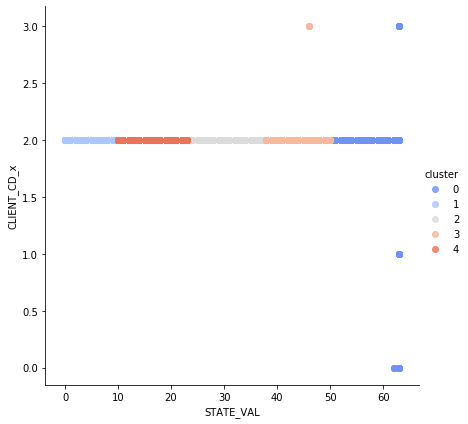

In [229]:
sns.lmplot('STATE_VAL', 'CLIENT_CD_x', data=X, hue='cluster', palette='coolwarm', size=6, aspect=1, fit_reg=False)
